In [1]:
!pip install scikit-learn
!pip install tensorflow
!pip install xgboost
!pip install pymc
!pip install bambi
!pip install lightgbm
!pip install shap

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import itertools

sns.set(style="dark")
plt.style.use("ggplot")
%matplotlib inline

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Linear Regression
from sklearn.linear_model import LinearRegression

# Decision Trees
from sklearn.tree import DecisionTreeRegressor

# KNN
from sklearn.neighbors import KNeighborsRegressor

# Neural Networks (Multi-layer Perceptron)
from sklearn.neural_network import MLPRegressor

# # Long Short-Term Memory (LSTM) networks implemented using deep learning frameworks like TensorFlow 
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Support Vector Machines (SVM)
from sklearn.svm import SVR

# Gradient Boosting Machines (XGBoost)
import xgboost as xgb

# # LightGBM
# import lightgbm as lgb

# # Generalized Linear Models
import pymc as pm
import statsmodels.api as sm
import bambi as bmb
import arviz as az

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [5]:
data = pd.read_csv('FEmerged_20182022.csv')
data['highest_restriction'] = data['highest_restriction'].fillna('None')
data.drop(columns=['Plastic Growth Rate'], inplace=True)
# bambi dont accept column names that have spaces so change column names 
data.rename(columns={'Plastic per day (ton)': 'Plastic_per_day_tons'}, inplace=True)
data.rename(columns={'Plastic per year (ton)': 'Plastic_per_year_tons'}, inplace=True)
data.rename(columns={'Land Area (km2)': 'Land_Area_km2'}, inplace=True)
data.rename(columns={'Years Since Start': 'Years_Since_Start'}, inplace=True)
data

,Year,Province,Regency/City,Plastic_per_day_tons,Plastic_per_year_tons,Land_Area_km2,Population,GDP,Gini,HDI,highest_restriction,start_date,Years_Since_Start,log_GDP,log_Gini,squareroot_landarea
0,2019,Aceh,ACEH SELATAN,17.468853,6375.918288,4175.38,238081.0,5.479426e+06,0.273,66.90,None,2019,0,6.738735,-0.563837,64.617180
1,2019,Aceh,ACEH TENGAH,25.242500,9213.435000,4468.42,212494.0,7.472446e+06,0.256,73.14,None,2019,0,6.873463,-0.591760,66.846241
2,2019,Aceh,SIMEULUE,15.495900,5655.559350,1821.75,93228.0,2.211886e+06,0.340,65.70,None,2019,0,6.344763,-0.468521,42.681963
3,2019,Aceh,GAYO LUES,6.398800,2335.562000,5541.29,94100.0,2.608734e+06,0.290,66.87,None,2019,0,6.416430,-0.537602,74.439841
4,2019,Aceh,BENER MERIAH,11.816469,4312.692510,1907.40,148175.0,4.423115e+06,0.267,72.97,None,2019,0,6.645728,-0.573489,43.673791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,2022,Sumatera Utara,HUMBANG HASUNDUTAN,7.712900,2814.984900,2351.51,202299.0,6.919485e+06,0.258,70.32,Fee,2020,2,6.840074,-0.588380,48.492371
1030,2022,Sumatera Utara,KOTA MEDAN,243.683302,88944.436534,279.29,2494512.0,2.801590e+08,0.399,81.76,Ban,2019,3,8.447405,-0.399027,16.711972
1031,2022,Sumatera Utara,KOTA PEMATANG SIANTAR,24.143000,8812.144000,75.92,274056.0,1.520831e+07,0.321,79.70,Fee,2020,2,7.182081,-0.493495,8.713208
1032,2022,Sumatera Utara,KOTA TEBING TINGGI,20.750895,7573.785300,39.17,177785.0,6.931267e+06,0.334,76.17,Ban,2018,4,6.840813,-0.476254,6.258594


In [6]:
rows_with_nan = data[data.isna().any(axis=1)]
rows_with_nan

,Year,Province,Regency/City,Plastic_per_day_tons,Plastic_per_year_tons,Land_Area_km2,Population,GDP,Gini,HDI,highest_restriction,start_date,Years_Since_Start,log_GDP,log_Gini,squareroot_landarea
715,2021,Papua Pegunungan,LANNY JAYA,NaN,NaN,6077.4,198780.0,2020051.93,0.293,48.68,Fee,2020,1,6.305363,-0.533132,77.957681


In [7]:
data.dropna(inplace=True)
data

,Year,Province,Regency/City,Plastic_per_day_tons,Plastic_per_year_tons,Land_Area_km2,Population,GDP,Gini,HDI,highest_restriction,start_date,Years_Since_Start,log_GDP,log_Gini,squareroot_landarea
0,2019,Aceh,ACEH SELATAN,17.468853,6375.918288,4175.38,238081.0,5.479426e+06,0.273,66.90,None,2019,0,6.738735,-0.563837,64.617180
1,2019,Aceh,ACEH TENGAH,25.242500,9213.435000,4468.42,212494.0,7.472446e+06,0.256,73.14,None,2019,0,6.873463,-0.591760,66.846241
2,2019,Aceh,SIMEULUE,15.495900,5655.559350,1821.75,93228.0,2.211886e+06,0.340,65.70,None,2019,0,6.344763,-0.468521,42.681963
3,2019,Aceh,GAYO LUES,6.398800,2335.562000,5541.29,94100.0,2.608734e+06,0.290,66.87,None,2019,0,6.416430,-0.537602,74.439841
4,2019,Aceh,BENER MERIAH,11.816469,4312.692510,1907.40,148175.0,4.423115e+06,0.267,72.97,None,2019,0,6.645728,-0.573489,43.673791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,2022,Sumatera Utara,HUMBANG HASUNDUTAN,7.712900,2814.984900,2351.51,202299.0,6.919485e+06,0.258,70.32,Fee,2020,2,6.840074,-0.588380,48.492371
1030,2022,Sumatera Utara,KOTA MEDAN,243.683302,88944.436534,279.29,2494512.0,2.801590e+08,0.399,81.76,Ban,2019,3,8.447405,-0.399027,16.711972
1031,2022,Sumatera Utara,KOTA PEMATANG SIANTAR,24.143000,8812.144000,75.92,274056.0,1.520831e+07,0.321,79.70,Fee,2020,2,7.182081,-0.493495,8.713208
1032,2022,Sumatera Utara,KOTA TEBING TINGGI,20.750895,7573.785300,39.17,177785.0,6.931267e+06,0.334,76.17,Ban,2018,4,6.840813,-0.476254,6.258594


# I. Comparing diff models

Baseline
- Linear Regression
- Decision Trees

Recommended methods from past literature included advanced neural networks such as 
- Neural Networks (e.g., Multi-layer Perceptron)
- Long Short-Term Memory (LSTM) networks for their ability to capture intricate temporal patterns
- random forest models for their adaptability to complex datasets
- Least squares Support Vector Machines (SVM) and standard SVM models. 

other methods i want to try
- Gradient Boosting Machines (e.g., XGBoost, LightGBM)
- generalized linear models -- can be frequentist OR bayesian
- nonparametric methods -- can be frequentist OR bayesian

#### TLDR: 
1) **use cities with bans to train and build model**
2) **evaluate accuracy by doing graphs of actual vs predicted, and general plastic vs years since start**
3) **evaluate interpretability by seeing coefficients, plotting the process, etc.**
4) **apply model to cities without bans**

In [8]:
# Identify cities with bans
cities_with_bans = data[data['highest_restriction'] == 'Ban']['Regency/City'].unique()
print(cities_with_bans)
ban_data = data[data['Regency/City'].isin(cities_with_bans)]
ban_data

['KOTA BANDA ACEH' 'JEMBRANA' 'BADUNG' 'GIANYAR' 'BANGLI' 'KARANGASEM'
 'BULELENG' 'KOTA DENPASAR' 'TABANAN' 'KLUNGKUNG' 'KOTA TANGERANG' 'LEBAK'
 'KULON PROGO' 'BANTUL' 'GUNUNGKIDUL' 'SLEMAN' 'KOTA YOGYAKARTA'
 'ADM. KEP. SERIBU' 'KOTA ADM. JAKARTA PUSAT' 'KOTA ADM. JAKARTA UTARA'
 'KOTA ADM. JAKARTA BARAT' 'KOTA ADM. JAKARTA SELATAN'
 'KOTA ADM. JAKARTA TIMUR' 'KOTA JAMBI' 'SUKABUMI' 'CIAMIS' 'BEKASI'
 'KOTA BOGOR' 'KOTA SUKABUMI' 'KOTA DEPOK' 'KOTA CIMAHI' 'KOTA BANDUNG'
 'INDRAMAYU' 'KOTA BEKASI' 'WONOGIRI' 'PATI' 'KUDUS' 'KOTA SEMARANG'
 'BANYUMAS' 'KOTA SALATIGA' 'TULUNGAGUNG' 'BLITAR' 'LUMAJANG' 'SITUBONDO'
 'GRESIK' 'PAMEKASAN' 'KOTA KEDIRI' 'KOTA MALANG' 'KOTA PROBOLINGGO'
 'KOTA SURABAYA' 'KOTA BATU' 'JOMBANG' 'KOTA PONTIANAK' 'TANAH LAUT'
 'BARITO KUALA' 'TAPIN' 'HULU SUNGAI UTARA' 'TANAH BUMBU'
 'KOTA BANJARMASIN' 'KOTA BANJARBARU' 'TABALONG' 'BANJAR' 'BERAU'
 'KOTA BALIKPAPAN' 'KOTA SAMARINDA' 'KOTA BONTANG' 'NUNUKAN'
 'KOTA TARAKAN' 'KOTA TANJUNG PINANG' 'KOTA AMBON' 'BIA

,Year,Province,Regency/City,Plastic_per_day_tons,Plastic_per_year_tons,Land_Area_km2,Population,GDP,Gini,HDI,highest_restriction,start_date,Years_Since_Start,log_GDP,log_Gini,squareroot_landarea
5,2019,Aceh,KOTA BANDA ACEH,16.224800,5922.049280,56.77,270321.0,1.856908e+07,0.289,85.07,Fee,2020,-1,7.268790,-0.539102,7.534587
13,2020,Aceh,KOTA BANDA ACEH,16.543720,6038.408160,56.77,252899.0,1.850163e+07,0.303,85.41,Ban,2020,0,7.267210,-0.518557,7.534587
17,2021,Aceh,KOTA BANDA ACEH,41.279220,15067.132760,56.77,255029.0,1.994340e+07,0.347,85.71,Ban,2020,1,7.299799,-0.459671,7.534587
35,2022,Aceh,KOTA BANDA ACEH,12.106080,4418.682240,56.77,257635.0,2.155695e+07,0.391,86.28,Ban,2020,2,7.333587,-0.407823,7.534587
39,2019,Bali,JEMBRANA,36.182120,13206.394240,849.13,278100.0,1.413670e+07,0.290,72.35,Ban,2019,0,7.150348,-0.537602,29.139835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,2020,Sumatera Utara,KOTA TEBING TINGGI,20.402910,7446.885660,39.17,166100.0,6.049163e+06,0.334,75.17,Ban,2018,2,6.781695,-0.476254,6.258594
1019,2021,Sumatera Utara,KOTA MEDAN,265.074000,96751.884000,279.29,2460858.0,2.547213e+08,0.402,81.21,Ban,2019,2,8.406065,-0.395774,16.711972
1021,2021,Sumatera Utara,KOTA TEBING TINGGI,20.562750,7505.422065,39.17,174969.0,6.349945e+06,0.344,75.42,Ban,2018,3,6.802770,-0.463442,6.258594
1030,2022,Sumatera Utara,KOTA MEDAN,243.683302,88944.436534,279.29,2494512.0,2.801590e+08,0.399,81.76,Ban,2019,3,8.447405,-0.399027,16.711972


In [9]:
def scatterplot_predvsactual(actual, pred, model_name):
    # Create scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(actual, pred, color='blue', alpha=0.5)
    
    # Add labels and title
    plt.title('Actual vs Predicted Plastic Pollution' + ' - ' + str(model_name))
    plt.xlabel('Actual Plastic per year (ton)')
    plt.ylabel('Predicted Plastic per year (ton)')
    plt.grid(True)
    
    # Add a diagonal line representing perfect predictions
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    
    plt.show()

In [10]:
def trend_predvsactual(test_features, actual, pred, model_name):
    # Calculate average and standard deviation of actual and predicted plastic per year
    avg_actual_plastic = actual.groupby(test_features['Years_Since_Start']).mean()
    std_dev_actual_plastic = actual.groupby(test_features['Years_Since_Start']).std()
    
    avg_predicted_plastic = pd.Series(pred, index=test_features['Years_Since_Start']).groupby(['Years_Since_Start']).mean()
    std_dev_predicted_plastic = pd.Series(pred, index=test_features['Years_Since_Start']).groupby(['Years_Since_Start']).std()
    
    # Plot the actual values
    plt.plot(avg_actual_plastic.index, avg_actual_plastic, label='Actual Plastic per year (ton)', color='blue')
    
    # Plot the predicted values
    plt.plot(avg_predicted_plastic.index, avg_predicted_plastic, label='Predicted Plastic per year (ton)', color='red')
    
    # Plot the shaded intervals representing variability for actual values
    plt.fill_between(avg_actual_plastic.index, avg_actual_plastic - std_dev_actual_plastic, avg_actual_plastic + std_dev_actual_plastic, color='blue', alpha=0.3)
    
    # Plot the shaded intervals representing variability for predicted values
    plt.fill_between(avg_predicted_plastic.index, avg_predicted_plastic - std_dev_predicted_plastic, avg_predicted_plastic + std_dev_predicted_plastic, color='red', alpha=0.3)
    
    # Add labels and title
    plt.xlabel('Years since start of ban')
    plt.ylabel('Plastic per year (ton)')
    plt.title('Actual vs Predicted Plastic Pollution Trends' + ' - ' + str(model_name))
    plt.legend()
    
    # Show the plot
    plt.show()

## *[Baseline Model] Linear Regression*

#### a) Implementation

In [9]:
# Define features and target variable
features = ['Population', 'log_GDP', 'log_Gini', 'squareroot_landarea', 'HDI', 'Years_Since_Start']
target = 'Plastic_per_year_tons'

# Split the data into features and target variable
X = ban_data[features]
y = ban_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Evaluate the model
y_pred_lr = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
y_pred_lr[:5]

Mean Squared Error: 442438137.6918364
R-squared Score: 0.62108469519799


array([14414.16339029, 95064.70582024,   778.42987035, 16496.79638952,
       27415.34925321])

#### b) Accuracy

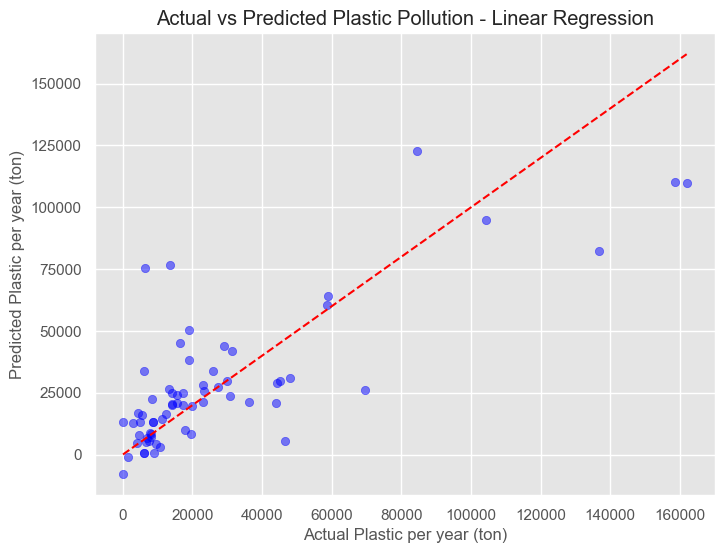

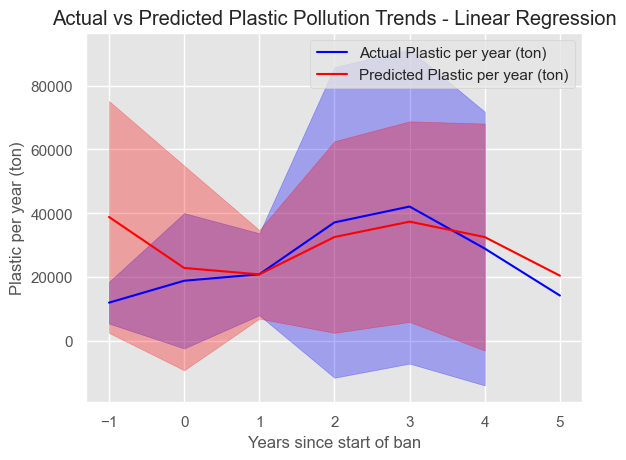

In [10]:
scatterplot_predvsactual(y_test, y_pred_lr, 'Linear Regression')
trend_predvsactual(X_test, y_test, y_pred_lr, 'Linear Regression')

#### c) Interpretability

In [11]:
# You can just run this cell to print out the coefficients for each feature:
print(features)
linear_model.coef_

['Population', 'log_GDP', 'log_Gini', 'squareroot_landarea', 'HDI', 'Years_Since_Start']


array([ 3.40026835e-02, -1.05057607e+03,  6.48288274e+03,  8.30522554e+01,
        7.29020794e+02,  2.54974737e+03])

**Assuming that all other features remain constant:**
- As population increase by 1, linear regression predicts that the plastic per year increases by $0.034$ $tons$.
- If the GDP doubles (since it's a log scale, so take exponential which is roughly 2.72), the model predicts a decrease of about $1050$ $tons$ of plastic per year.
- For every point increase in the Gini index, the model predicts an increase of about $6483$ $tons$ of plastic per year.
- If the land area increases by 1 square root unit (whatever that may be), the model predicts an increase of about $83$ $tons$ of plastic per year.
- For every point increase in the HDI, the model predicts an increase of about $729$ $tons$ of plastic per year.
- For each additional year since the ban started, the model predicts an increase of about $2550$ $tons$ of plastic per year.

**There are some weird relationships reflected here** -- namely with how plastic is predicted to *increase* even though a ban has been enacted for longer. However, this is assuming a constant rate of change when in reality, the relationship between "Years Since Start" and "Plastic per year" might be more complex, seen by how plastic after a good amount of years decreases; overall decrease. 

To address this issue, we have to try exploring such non-linear relationships; try fitting a model that allows for non-linear relationships between predictors and the response variable, ***such as below!***

## *Neural Networks*

### LSTM

#### (cannot import tensorflow bc memory in jupyter is too little -- moving to google colab just for this one then exporting results below)

In [12]:
!pip install joblib

In [13]:
from sklearn.preprocessing import StandardScaler
import joblib

# Load saved data files
predictions_unscaled = np.loadtxt("lstm_googlecolab/unscaled_predictions.csv", delimiter=",")
y_test_unscaled = np.loadtxt("lstm_googlecolab/unscaled_y_test.csv", delimiter=",")
X_test_reshaped = np.load("lstm_googlecolab/X_test_reshaped.npy")

# Load the scaler object
scaler = joblib.load("lstm_googlecolab/scaler.pkl")

/Users/sandy/opt/anaconda3/envs/ESthesisSW/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


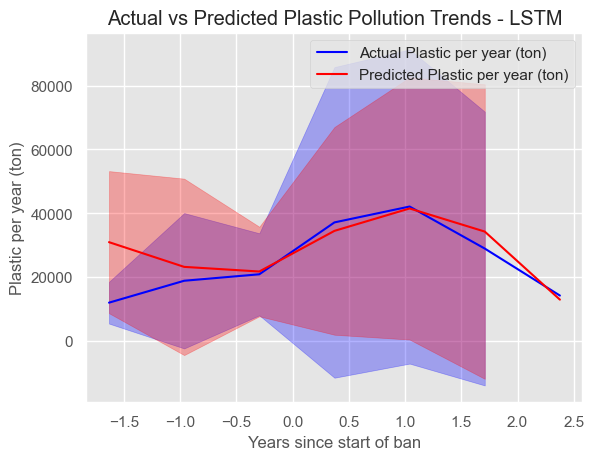

In [14]:
# Inverse scaling for actual and predicted values
actual_inverse_scaled = scaler.inverse_transform(y_test_unscaled.reshape(-1, 1)).flatten()
pred_inverse_scaled = scaler.inverse_transform(predictions_unscaled.reshape(-1, 1)).flatten()

# Convert actual and predicted values to pandas DataFrames
actual_df = pd.DataFrame({'Years_Since_Start': X_test_reshaped[:, 0, -1], 'Actual_Plastic_Per_Year': actual_inverse_scaled})
pred_df = pd.DataFrame({'Years_Since_Start': X_test_reshaped[:, 0, -1], 'Predicted_Plastic_Per_Year': pred_inverse_scaled})

# Calculate average and standard deviation of actual and predicted plastic per year
avg_actual_plastic = actual_df.groupby('Years_Since_Start')['Actual_Plastic_Per_Year'].mean()
std_dev_actual_plastic = actual_df.groupby('Years_Since_Start')['Actual_Plastic_Per_Year'].std()

avg_predicted_plastic = pred_df.groupby('Years_Since_Start')['Predicted_Plastic_Per_Year'].mean()
std_dev_predicted_plastic = pred_df.groupby('Years_Since_Start')['Predicted_Plastic_Per_Year'].std()

# Plot the actual values
plt.plot(avg_actual_plastic.index, avg_actual_plastic, label='Actual Plastic per year (ton)', color='blue')

# Plot the predicted values
plt.plot(avg_predicted_plastic.index, avg_predicted_plastic, label='Predicted Plastic per year (ton)', color='red')

# Plot the shaded intervals representing variability for actual values
plt.fill_between(avg_actual_plastic.index, avg_actual_plastic - std_dev_actual_plastic, avg_actual_plastic + std_dev_actual_plastic, color='blue', alpha=0.3)

# Plot the shaded intervals representing variability for predicted values
plt.fill_between(avg_predicted_plastic.index, avg_predicted_plastic - std_dev_predicted_plastic, avg_predicted_plastic + std_dev_predicted_plastic, color='red', alpha=0.3)

# Add labels and title
plt.xlabel('Years since start of ban')
plt.ylabel('Plastic per year (ton)')
plt.title('Actual vs Predicted Plastic Pollution Trends - ' + 'LSTM')
plt.legend()

# Show the plot
plt.show()

## *Support Vector Machines*

Least Squares Support Vector Machines (LS-SVM) with a linear kernel can be viewed as a regression technique that finds a linear hyperplane to approximate the relationship between input features and target variables, while minimizing the prediction error using least squares optimization. 

In [15]:
# Define features and target variable
features = ['Population', 'log_GDP', 'log_Gini', 'squareroot_landarea', 'HDI', 'Years_Since_Start']
target = 'Plastic_per_year_tons'

# Split the data into features and target variable
X = ban_data[features]
y = ban_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
# Transform the test data using the scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(259, 6)
(65, 6)


A big part of SVM models is choosing the right kernel type, and doing so depends on the characteristics of the dataset, the complexity of the relationships between features and the target variable, and computational considerations. Some common ones are:
- RBF Kernel: RBF kernels are versatile and can capture complex non-linear relationships between features and the target variable.
They are suitable when you don't have prior knowledge about the data's underlying structure.
RBF kernels are commonly used and can provide good performance across a wide range of datasets.
- Linear Kernel: If your dataset exhibits clear linear separability or is relatively simple, a linear kernel might suffice.
Linear kernels are computationally efficient and less prone to overfitting, making them suitable for datasets with a large number of features.
- Polynomial Kernel: Polynomial kernels can capture non-linear relationships like RBF kernels but may require careful tuning of the polynomial degree parameter to avoid overfitting.
They can be effective if the relationships between features and the target variable exhibit polynomial patterns.



In [17]:
svm_model = SVR(kernel='linear')  # linear has the lowest MSE so will use that
svm_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_svm = svm_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_svm)
r2 = r2_score(y_test, y_pred_svm)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
y_pred_svm[:5]

Mean Squared Error: 1322360629.8671887
R-squared Score: -0.13250336812804342


array([13800.68148408, 14742.5325517 , 13677.37840767, 13881.63216873,
       14048.41808583])

#### a) Accuracy

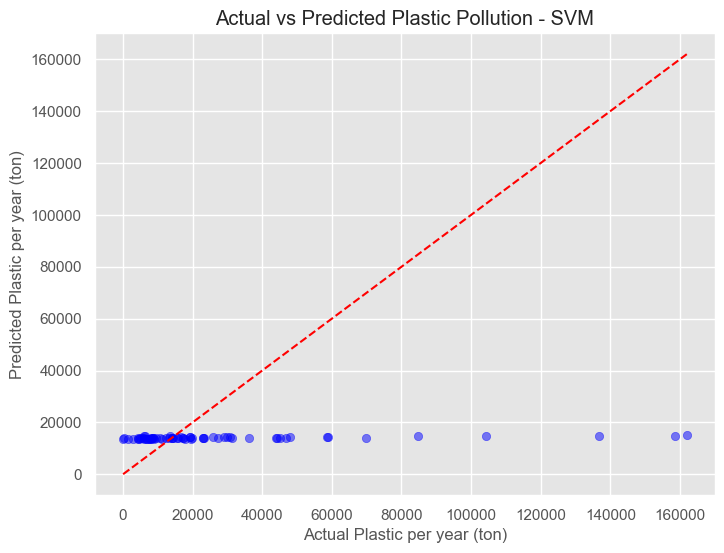

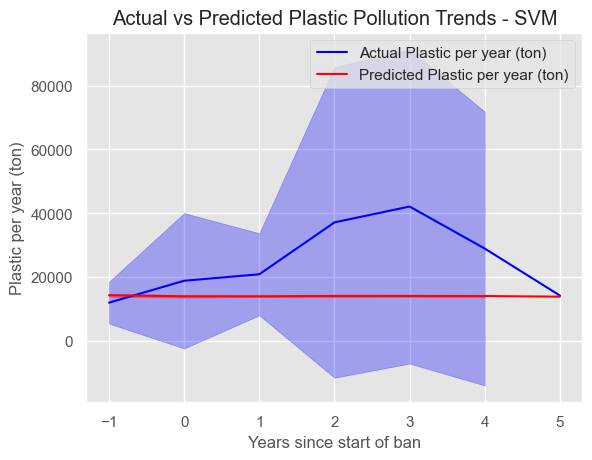

In [18]:
scatterplot_predvsactual(y_test, y_pred_svm, 'SVM')
trend_predvsactual(X_test, y_test, y_pred_svm, 'SVM')

#### b) Interpretability

To understand how the model fits the data, we can visualize the decision boundary and margins. But before doing so, we need to choose two features for visualization for the 2 axes allowed. To choose just 2 out of the 6 features, we can use dimensionality reduction techniques such as PCA (Principal Component Analysis) to reduce the dimensionality of the data while preserving most of the variance. 

In [19]:
from sklearn.decomposition import PCA

# Fit PCA model
pca = PCA(n_components=2)
pca.fit(X)

# Access loadings (coefficients) for PC1 and PC2
loadings = pca.components_

# Create a DataFrame to display loadings
loadings_df = pd.DataFrame(loadings, columns=features, index=['PC1', 'PC2'])

# Display loadings
print("Loadings of each feature on PC1 and PC2:")
print(loadings_df)

Loadings of each feature on PC1 and PC2:
     Population       log_GDP      log_Gini  squareroot_landarea       HDI  \
PC1    1.000000  5.471756e-07  2.914587e-08            -0.000009  0.000002   
PC2    0.000009 -2.927675e-04 -2.627157e-04             0.993660 -0.112424   

     Years_Since_Start  
PC1      -1.550734e-07  
PC2      -5.694172e-04  


Now that we know "Population" and "Squareroot_Landarea" are the two most indicative features, we can visualize the decision boundary and margins based on these two features. 

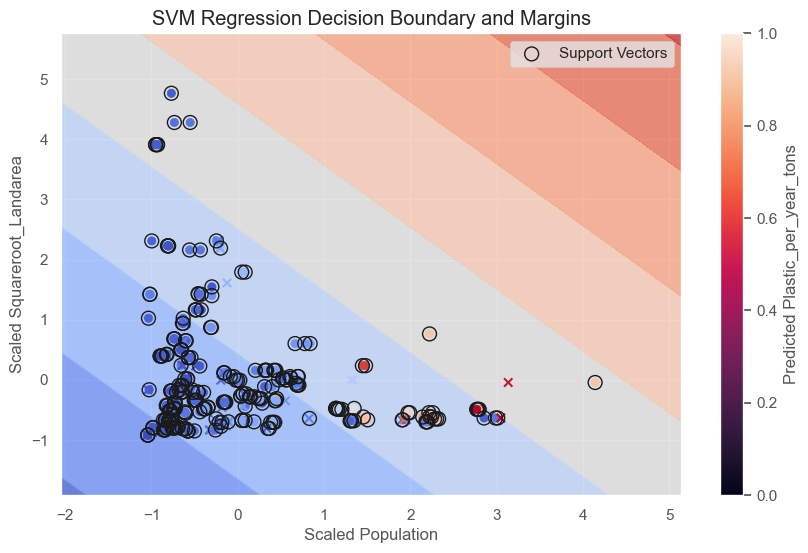

In [20]:
# Create a grid to evaluate the model
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 3].min() - 1, X_train_scaled[:, 3].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Make predictions on the grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 3], c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 3], c=y_test, cmap=plt.cm.coolwarm, marker='x')
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 3],
            s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
plt.xlabel('Scaled Population')
plt.ylabel('Scaled Squareroot_Landarea')
plt.title('SVM Regression Decision Boundary and Margins')
plt.colorbar(label='Predicted Plastic_per_year_tons')
plt.legend()
plt.show()

### Gradient Boosting Models

In [11]:
# Define features and target variable
features = ['Population', 'log_GDP', 'log_Gini', 'squareroot_landarea', 'HDI', 'Years_Since_Start']
target = 'Plastic_per_year_tons'

# Split the data into features and target variable
X = ban_data[features]
y = ban_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Evaluate the model
y_pred_xgb = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
y_pred_xgb[:5]

Mean Squared Error: 309108544.76874995
R-squared Score: 0.7352715589370455


array([ 13854.602, 106769.   ,   1677.023,  17108.65 ,  23859.336],
      dtype=float32)

#### a) Accuracy

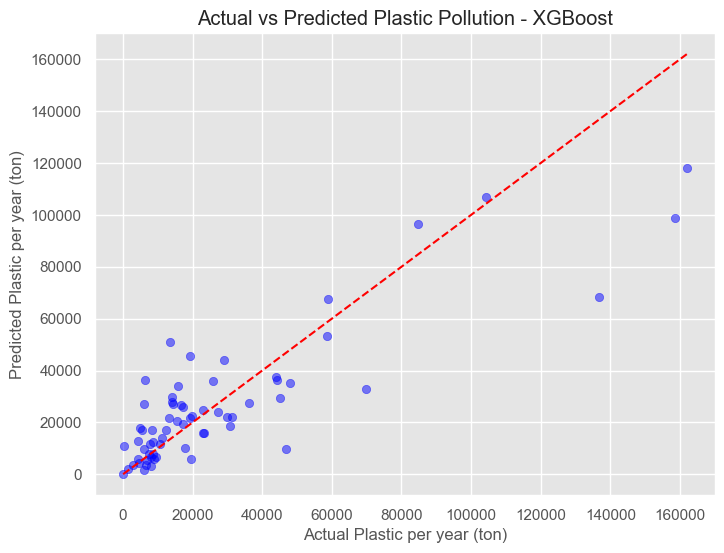

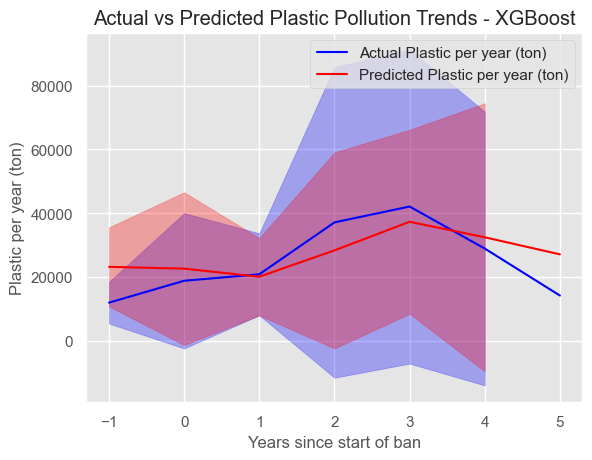

In [12]:
scatterplot_predvsactual(y_test, y_pred_xgb, 'XGBoost')
trend_predvsactual(X_test, y_test, y_pred_xgb, 'XGBoost')

#### b) Interpretability

XGBoost provides a feature importance score for each feature, indicating its relative importance in the model's predictions. You can visualize feature importance using a bar plot to identify the most influential features.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

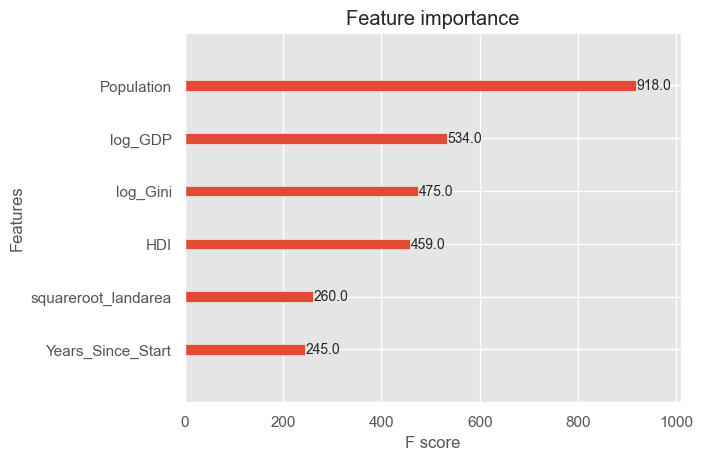

In [13]:
xgb.plot_importance(xgb_model)


SHAP (SHapley Additive exPlanations) values provide a way to explain the output of any machine learning model. They quantify the impact of each feature on the model's predictions for individual instances.

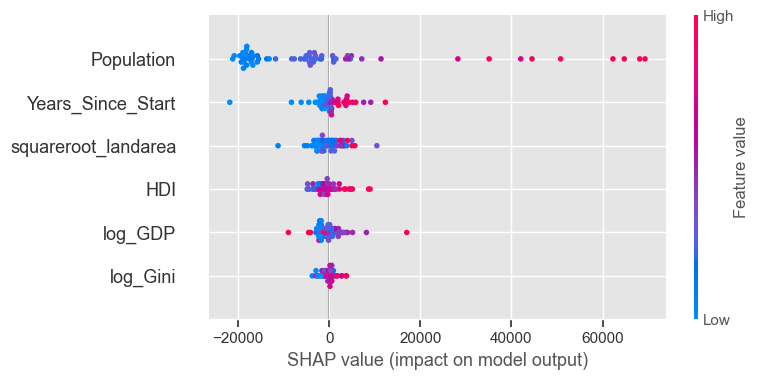

In [14]:
import shap
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

Based on these provided feature importance scores and SHAP values, none of the features consistently rank lower in importance across both metrics. And all of them are deemed critical based on domain knowledge. So I will not be deleting any features from my model; keep it all in.

## *Generalized Linear Models (GLMs)*

Generalized linear models (GLMs) use X to predict Y by estimating weights B. GLMs include 2 functions 1) linear function which multiplies and/or adds the predictions and coefficients, 2) inverse link function which generated the likelihood function. The linear function is what makes this GLM model linear. 

#### Step 1) Determine outcome likelihood/distribution for this specific problem. Common choices include Gaussian (normal), Poisson, or gamma distributions. 
Normal Distribution (Gaussian):
- Characteristics: Symmetric, bell-shaped curve.
- Interpretation: If the histogram resembles a symmetric bell curve, with most of the data concentrated around the mean and tails extending equally in both directions, a normal distribution might be appropriate.

Poisson Distribution:
- Characteristics: Discrete distribution for count data, typically with non-negative integer values.
- Interpretation: If the response variable represents counts of events occurring in fixed intervals of time or space, and the data is right-skewed with a longer right tail (common for count data), a Poisson distribution might be appropriate.

Gamma Distribution:
- Characteristics: Continuous distribution for non-negative, right-skewed data.
- Interpretation: If the response variable is continuous, non-negative, and right-skewed with a longer right tail, a gamma distribution might be appropriate, especially if the data includes zero values.

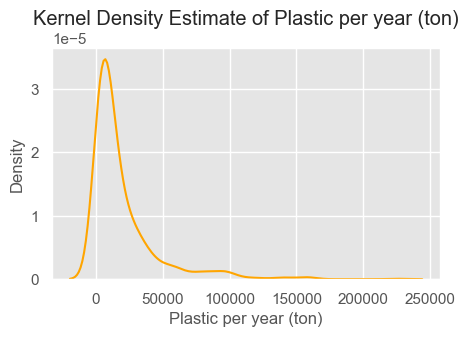

In [25]:
# Plot kernel density estimate
plt.figure(figsize=(5, 3))
sns.kdeplot(data['Plastic_per_year_tons'], color='orange')
plt.title('Kernel Density Estimate of Plastic per year (ton)')
plt.xlabel('Plastic per year (ton)')
plt.ylabel('Density')
plt.show()


It is definitely not normal distribution as it is not centered in the middle; it is right-skewed. Between poisson and gamma distribution, the main difference is that poisson is for discrete variables and gamma is for continuous variables. In this case, plastic values most likely are continuous variable as it can take on any real value within a range, and there are no gaps or interruptions between the values. Let's try gamma first then try poisson if model evaluation is bad.

#### Step 2) Determine the link function for this specific problem. 
- For continuous response variables, the identity link function is typically used.
- For count data (if you decide to model plastic per year as counts), the log link function is often used with the Poisson distribution.
- For binary response variables, the logit link function is used.

#### Step 3) Build and evaluate model. 
Let's try both frequentist GLMs as well as Bayesian GLMs. 

### Frequentist Regression using [`statsmodels.api`](https://www.statsmodels.org/stable/glm.html) 
Can also fit different GLMs with different distributions and link functions and compare their performance using evaluation metrics such as likelihood-based metrics like AIC or BIC. 
- AIC (Akaike Information Criterion): AIC is a measure of the relative quality of a statistical model. It balances the goodness-of-fit of the model with its complexity, penalizing for the number of parameters. A lower AIC value indicates a better model. 
- BIC (Bayesian Information Criterion): Similar to AIC, BIC is another measure of the relative quality of a statistical model. It also balances model fit and complexity but typically penalizes for model complexity more heavily than AIC. 

In [26]:
gamma_model = sm.GLM(ban_data["Plastic_per_year_tons"], 
                    exog = sm.add_constant(ban_data[['Population', 'log_GDP', 'log_Gini', 'squareroot_landarea', 'HDI', 'Years_Since_Start']]), 
                  family=sm.families.Gamma())
gamma_results = gamma_model.fit()
print(gamma_results.summary())

                   Generalized Linear Model Regression Results                   
Dep. Variable:     Plastic_per_year_tons   No. Observations:                  324
Model:                               GLM   Df Residuals:                      317
Model Family:                      Gamma   Df Model:                            6
Link Function:              InversePower   Scale:                          1.1822
Method:                             IRLS   Log-Likelihood:                -3862.1
Date:                   Thu, 18 Apr 2024   Deviance:                       871.23
Time:                           14:06:43   Pearson chi2:                     375.
No. Iterations:                       11   Pseudo R-squ. (CS):             -2.972
Covariance Type:               nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
cons

/Users/sandy/opt/anaconda3/envs/ESthesisSW/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


In [27]:
# Fit Poisson regression model
# poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson(link=sm.families.links.log()))
poisson_model = sm.GLM(ban_data["Plastic_per_year_tons"], 
                    exog = sm.add_constant(ban_data[['Population', 'log_GDP', 'log_Gini', 'squareroot_landarea', 'HDI', 'Years_Since_Start']]), 
                  family=sm.families.Poisson())
poisson_results = poisson_model.fit()
print(poisson_results.summary())

                   Generalized Linear Model Regression Results                   
Dep. Variable:     Plastic_per_year_tons   No. Observations:                  324
Model:                               GLM   Df Residuals:                      317
Model Family:                    Poisson   Df Model:                            6
Link Function:                       Log   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:            -1.6132e+06
Date:                   Thu, 18 Apr 2024   Deviance:                   3.2227e+06
Time:                           14:06:43   Pearson chi2:                 3.48e+06
No. Iterations:                        6   Pseudo R-squ. (CS):              1.000
Covariance Type:               nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
cons

In [28]:
# Compare models using AIC or BIC
print("Poisson Model AIC:", poisson_results.aic)
print("Gamma Model AIC:", gamma_results.aic)

print("Poisson Model BIC:", poisson_results.bic)
print("Gamma Model BIC:", gamma_results.bic)

Poisson Model AIC: 3226420.526935112
Gamma Model AIC: 7738.212650163737
Poisson Model BIC: 3220859.133268782
Gamma Model BIC: -961.2614616558074


/Users/sandy/opt/anaconda3/envs/ESthesisSW/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


Based on the AIC and BIC values: The Poisson model has significantly higher AIC and BIC values compared to the Gamma model, and the Gamma model has substantially lower AIC and BIC values, indicating better model fit. 
Therefore, according to both AIC and BIC, the **Gamma model appears to be the better choice for my data.** 
*One limitation! Negative BIC values can occur when the model is too complex relative to the data, and the penalty for complexity exceeds the improvement in fit. It's unusual to see negative BIC values.*

In [29]:
# Get the predicted values for all train and test; that's how GLM does it
gammapred = gamma_results.predict(exog=sm.add_constant(ban_data[['Population', 'log_GDP', 'log_Gini', 'squareroot_landarea', 'HDI', 'Years_Since_Start']]))
# Get the subset of predicted values corresponding to our test set indices
y_pred_gammaglm = gammapred[y_test.index]

y_pred_gammaglm[:5]


336     14538.000060
221    107010.067006
352     11401.884791
44      15882.368594
473     16506.569165
dtype: float64

#### a) Accuracy

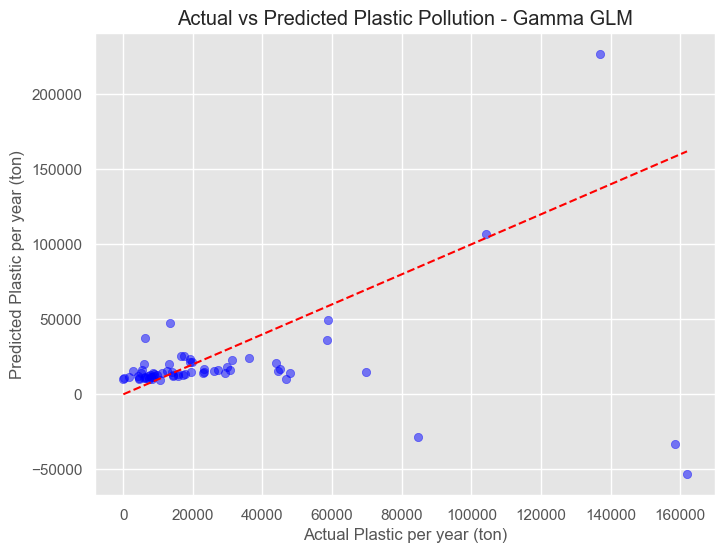

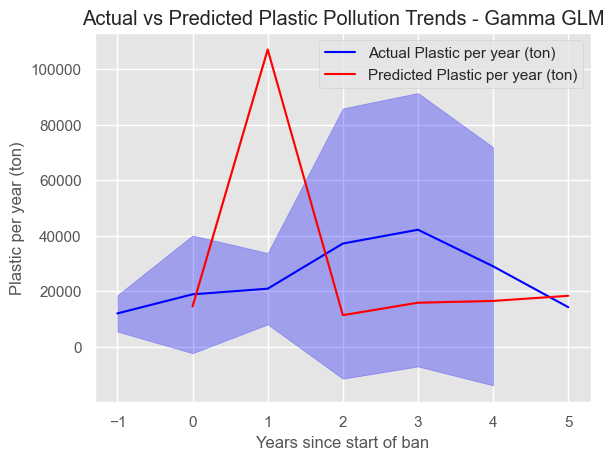

In [30]:
scatterplot_predvsactual(y_test, y_pred_gammaglm, 'Gamma GLM')
trend_predvsactual(X_test, y_test, y_pred_gammaglm.reset_index(drop=True), 'Gamma GLM')

In [31]:
print("Deviance:", gamma_results.deviance)

Deviance: 871.234232850361


Deviance is a measure of the goodness-of-fit of the model. It represents how well the model fits the data compared to a model with perfect fit. A lower deviance indicates a better fit. The deviance is 871.23 suggests that the model fits the data reasonably well.

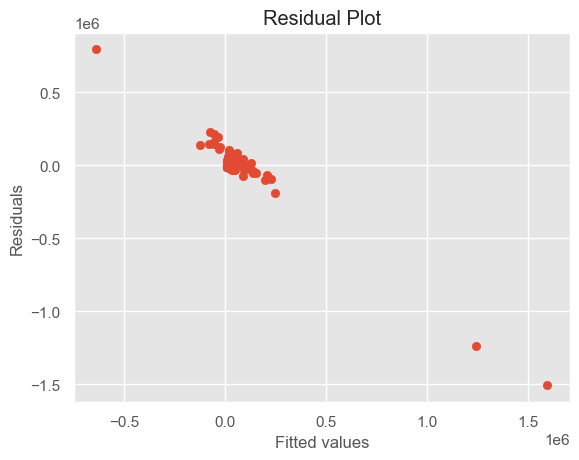

In [32]:
residuals = gamma_results.resid_response
plt.scatter(gamma_results.mu, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Points along a downward line, with most points clustered around (0,0), indicate that the model is doing a reasonable job of capturing the relationship between the predictors and the response variable. The downward trend suggests that the model may be systematically underpredicting the outcome variable as the predicted values increase.

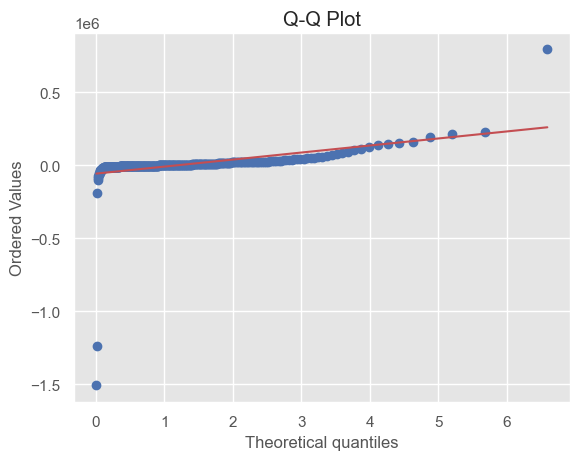

In [33]:
import scipy.stats as stats
stats.probplot(residuals, dist="gamma", sparams=gamma_results.scale, plot=plt)
plt.title('Q-Q Plot')
plt.show()

A Q-Q plot compares the distribution of the residuals to a theoretical distribution (in this case, the assumed Gamma distribution). Most of the data points falling along this diagonal line suggest that the residuals are approximately normally distributed. This is a good indication that the assumptions of the Gamma GLM are met.

#### b) Interpretability

In [34]:
print(gamma_results.params)
print(gamma_results.pvalues)

const                  2.551905e-04
Population            -2.888656e-11
log_GDP               -2.002355e-05
log_Gini               1.025214e-04
squareroot_landarea   -1.561902e-07
HDI                    5.473600e-07
Years_Since_Start     -4.864015e-06
dtype: float64
const                  1.460915e-06
Population             2.289789e-21
log_GDP                1.312273e-03
log_Gini               2.836776e-03
squareroot_landarea    1.818407e-01
HDI                    3.530195e-01
Years_Since_Start      4.725493e-20
dtype: float64


The p-values indicate the statistical significance of each predictor variable's contribution to the model. Smaller p-values suggest stronger evidence against the null hypothesis (i.e., the coefficient is equal to zero), indicating that the predictor variable is statistically significant in predicting the outcome variable.

### Bayesian Regression via sampling using [`Bambi`](https://bambinos.github.io/bambi/) (a wrapper on `PyMC` that simplifies model construction)
As with any Bayesian parameter estimation task, we have to distill our problem setup into a likelihood and prior before we can proceed. 

In [35]:

plastic_formula = "Plastic_per_year_tons ~ Population + log_GDP + log_Gini + squareroot_landarea + HDI + Years_Since_Start"

gamma_bayesian = bmb.Model(formula=plastic_formula, data=ban_data, family='gamma')
gamma_samples = gamma_bayesian.fit(random_seed=0)

az.plot_posterior(gamma_samples, round_to=3)
plt.show()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


SamplingError: Initial evaluation of model at starting point failed!
Starting values:
{'Plastic_per_year_tons_alpha_log__': array(0.72351498), 'Intercept': array(0.26026236), 'Population': array(0.83110974), 'log_GDP': array(0.89802754), 'log_Gini': array(-0.93806344), 'squareroot_landarea': array(-0.3785318), 'HDI': array(-0.81428601), 'Years_Since_Start': array(0.17563482)}

Logp initial evaluation results:
{'Plastic_per_year_tons_alpha': -1.39, 'Intercept': -4.84, 'Population': -31638803123.43, 'log_GDP': -2.48, 'log_Gini': -4.63, 'squareroot_landarea': -12.17, 'HDI': -2.12, 'Years_Since_Start': -1.45, 'Plastic_per_year_tons': -inf}
You can call `model.debug()` for more details.

SamplingError is if initial values used to start the sampling process are not appropriate for the model. To fix this need more informative priors; need to specify priors (when we don't specify a prior for our model parameters, Bambi automatically supplies a weakly informative one based on your data by default which is what is happening above). 

We do not have a strong belief on what this is, but we can estimate prior distributions by using domain knowledge like the following -- 
- Continuous Variables: e.g. since Gini index is bounded between 0 and 1, so a beta distribution could be appropriate.
- Categorical Variables: use a categorical distribution or specify separate priors for each category.
- Interactions and Nonlinear Effects: define joint prior distributions or use more complex distributions such as multivariate normal distributions.

Worst come to worst, if you lack strong prior knowledge, can use weakly Informative Priors. These are priors that are broad enough to allow the data to inform the posterior but provide some regularization. For example, you could use normal distributions with large variances or beta distributions with equal shape parameters.

### Bayesian Regression via sampling using [`PyMC`](https://www.pymc.io/welcome.html) (from scratch)
In essence, PyMC is just a number generator with extra steps. Given a *likelihood* and a *prior*, it simulates thousands of samples to create an empirical distribution that approximates the true posterior distribution. With those samples, we're able to calculate values of interest (such as the posterior mean, MAP, etc.), and create estimates of $\theta$.

1) We can estimate the **priors distributions** for our indicators by a) using domain knowledge (e.g. Gini is 0 to 1 range so Beta distribution would be suitable) and b) displaying the kernel density plots for each and roughly matching the shape of the graph to the shape of a distribution. 
2) After that, we can estimate the **parameters of each distribution** (e.g. what is the a and b for Gini's Beta distribution?)

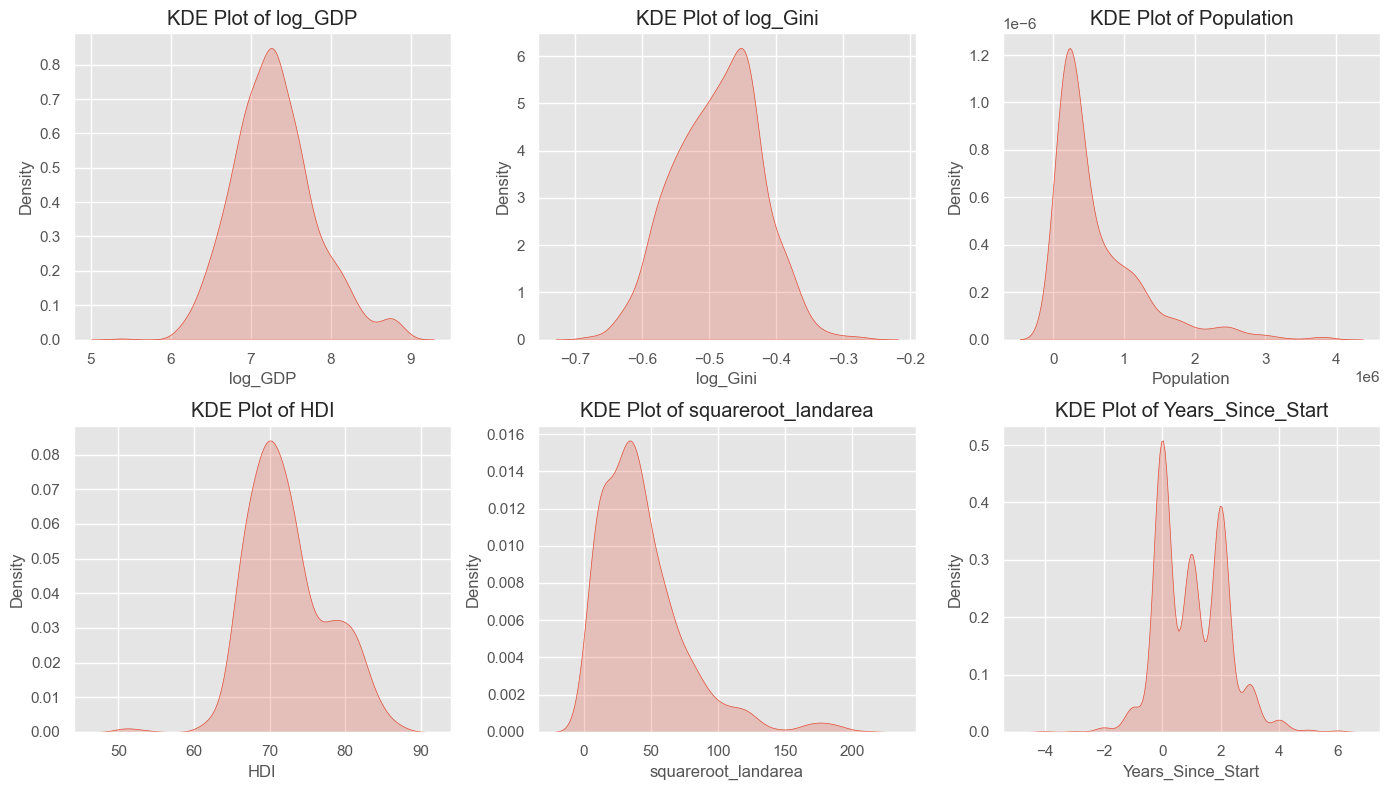

In [36]:
# Define the list of indicators
indicators = ['log_GDP', 'log_Gini', 'Population', 'HDI', 'squareroot_landarea', 'Years_Since_Start']

# Create subplots with 2 rows
num_rows = 2
num_cols = len(indicators) // num_rows + (len(indicators) % num_rows > 0)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 8))

# Plot KDE for each indicator
for i, indicator in enumerate(indicators):
    row = i // num_cols
    col = i % num_cols
    sns.kdeplot(data[indicator], ax=axes[row, col], fill=True)
    axes[row, col].set_title(f'KDE Plot of {indicator}')

# Adjust layout
plt.tight_layout()
plt.show()


- (log) GDP: **Log normal**; since the log of GDP seems to follows a normal distribution seen by how its roughly symmetrical around the center.
- (log) Gini Index: Gini bounded between 0 and 1, so a **Beta** distribution could be what is shown in the graph.
- Population: Right skewed, so probably **Gamma**
- HDI: slightly left skewed seen by the tail, is also slightly bimodal, but for the most part is centered and symmetrical resembling a **normal** distribution -- though more unsure about this
- (sqrt) Land area: Right skewed, so try **Gamma**
- Years since start date of ban: multi-modal; many modes meaning it might not be appropriate to assume a single probability distribution for the entire variable. ***!! this may indicate the need for non-parametric methods or mixed methods or hierarchical methods !!***

***It's clear we keep running into issues whenever we use a Bayesian approach to this prediction problem, so let's stick to frequentist nonparametric methods.***

## *Nonparametric methods*
Nonparametric methods are statistical techniques that do not make explicit assumptions about the functional form or distributional shape of the underlying population. Instead of estimating parameters based on specific parametric models, nonparametric methods seek to directly estimate patterns or relationships from the data itself. 

### K-Nearest Neighbors

In [37]:
# Define features and target variable
features = ['Population', 'log_GDP', 'log_Gini', 'squareroot_landarea', 'HDI', 'Years_Since_Start']
target = 'Plastic_per_year_tons'

# Split the data into features and target variable
X = ban_data[features]
y = ban_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNN regressor
knn = KNeighborsRegressor(n_neighbors=6)  # You can adjust the number of neighbors as needed

# Fit the model
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error:", mse)
y_pred_knn[:5]

Mean Squared Error: 502097431.4229164


array([13223.65007746, 98627.38626937,  3660.87307554, 11169.0934255 ,
       20868.35431973])

#### a) Accuracy

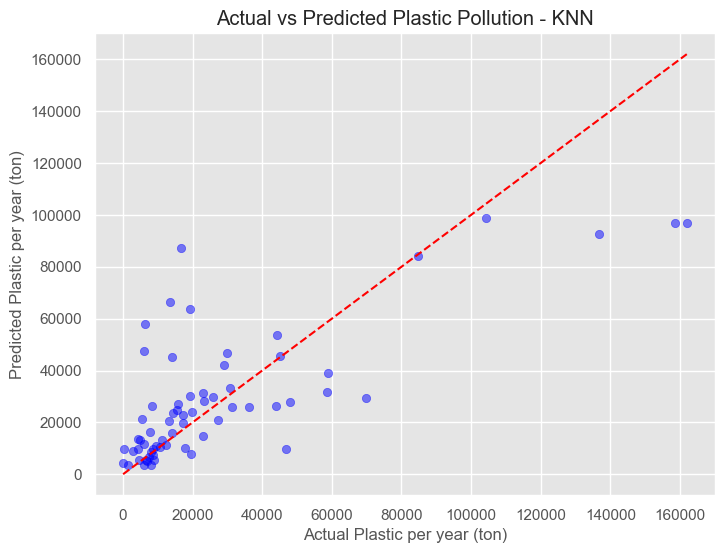

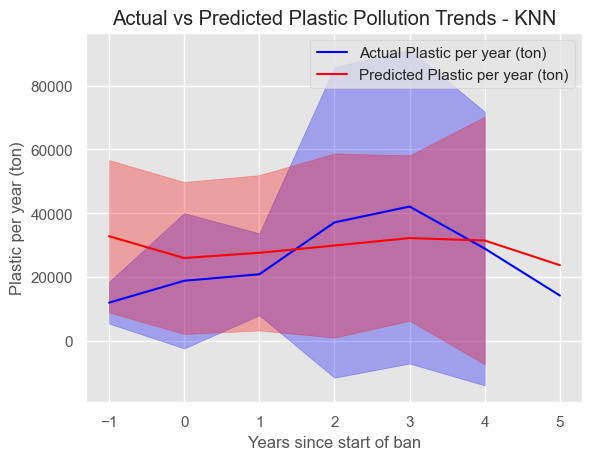

In [38]:
scatterplot_predvsactual(y_test, y_pred_knn, 'KNN')
trend_predvsactual(X_test, y_test, y_pred_knn, 'KNN')

#### b) Interpretability 

Since our KNN has 6 features in it, to visualize the decision boundaries of your KNN model -- in other words, see how KNN is making its decisions for predictions -- we need to use dimensionality reduction techniques such as Principal Component Analysis (PCA) to project the data into a 2D space.

Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms the original features into a new set of linearly uncorrelated variables called principal components.
- Principal components (PC1 and PC2) represent linear combinations of the original features (population, land area, Gini index, GDP, HDI, years since the start of the ban) that capture the most variance in the data.
- PC1 and PC2 are orthogonal to each other, and PC1 captures the direction of maximum variance in the data, while PC2 captures the direction of the second highest variance orthogonal to PC1.

*When you visualize the decision boundaries of your KNN model in the space defined by PC1 and PC2, you're essentially examining how KNN makes decisions based on these transformed features (may lose some information, but generally still provide insights into different classes are separated in the feature space.)*

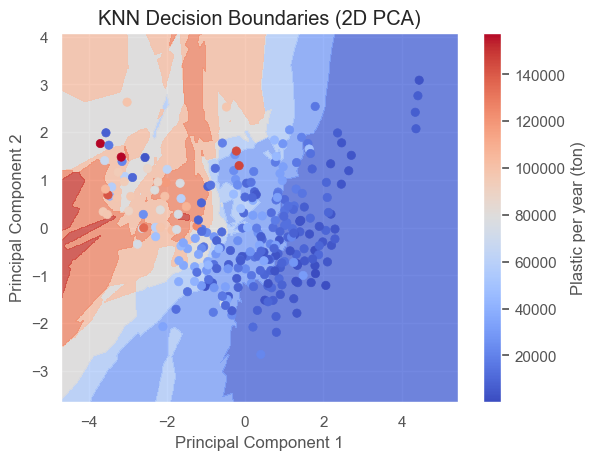

In [39]:
from sklearn.decomposition import PCA

def plot_decision_boundaries(model, X, y):
    # Reduce dimensionality to 2D using PCA
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)
    
    # Define mesh grid
    h = .02  # step size in the mesh
    x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
    y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the class for each point in the mesh grid
    Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundaries and data points
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('KNN Decision Boundaries (2D PCA)')
    
    # Add color bar
    cbar = plt.colorbar()
    cbar.set_label('Plastic per year (ton)')
    
    plt.show()

plot_decision_boundaries(knn, X_train_scaled, y_train)


Red points in the blue area of the graph indicate instances where the KNN model predicted higher levels of plastic production (red) in regions where the actual observed plastic production was lower (blue). Most of the time though, model predicted at least around within same range.

In [40]:
from sklearn.decomposition import PCA

# Fit PCA model
pca = PCA(n_components=2)
pca.fit(X)

# Access loadings (coefficients) for PC1 and PC2
loadings = pca.components_

# Create a DataFrame to display loadings
loadings_df = pd.DataFrame(loadings, columns=features, index=['PC1', 'PC2'])

# Display loadings
print("Loadings of each feature on PC1 and PC2:")
print(loadings_df)

Loadings of each feature on PC1 and PC2:
     Population       log_GDP      log_Gini  squareroot_landarea       HDI  \
PC1    1.000000  5.471756e-07  2.914587e-08            -0.000009  0.000002   
PC2    0.000009 -2.927675e-04 -2.627157e-04             0.993660 -0.112424   

     Years_Since_Start  
PC1      -1.550734e-07  
PC2      -5.694172e-04  


PC1 is primarily influenced by Population and PC2 is primarily influenced by squareroot_landarea, thus suggesting that KNN is likely making its decisions based on these two features. Note this does not mean population and squareroot_landarea are the most predictive features for the target variable plastic pollution.

### Decision Trees

In [41]:
# Define features and target variable
features = ['Population', 'log_GDP', 'log_Gini', 'squareroot_landarea', 'HDI', 'Years_Since_Start']
target = 'Plastic_per_year_tons'

# Split the data into features and target variable
X = ban_data[features]
y = ban_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

# Evaluate the model
y_pred_tree = decision_tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred_tree)
r2 = r2_score(y_test, y_pred_tree)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
y_pred_tree[:5]

Mean Squared Error: 404472588.035852
R-squared Score: 0.6535993601744822


array([ 13783.86057689, 135288.933     ,   1252.661144  ,  15169.714     ,
        23606.116308  ])

#### a) Accuracy

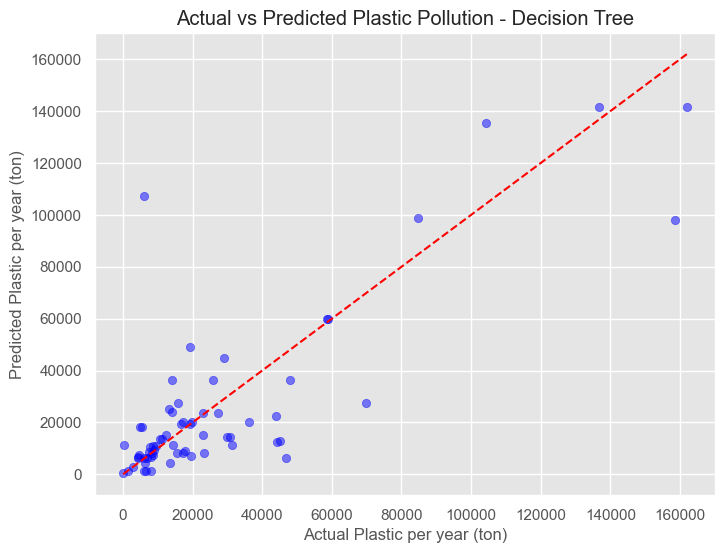

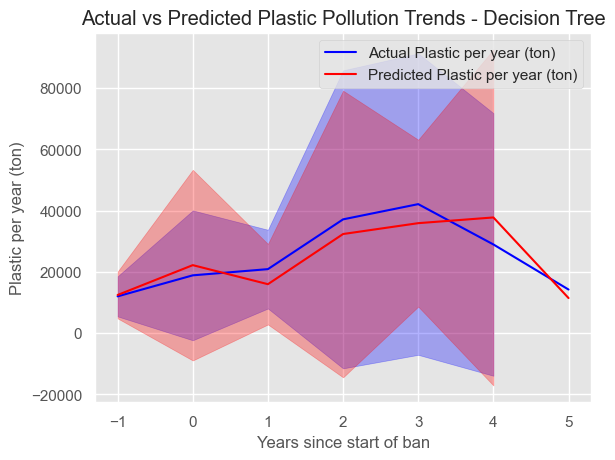

In [42]:
scatterplot_predvsactual(y_test, y_pred_tree, 'Decision Tree')
trend_predvsactual(X_test, y_test, y_pred_tree, 'Decision Tree')

#### b) Interpretability

We'll use the `plot_tree` function to draw the decision tree:

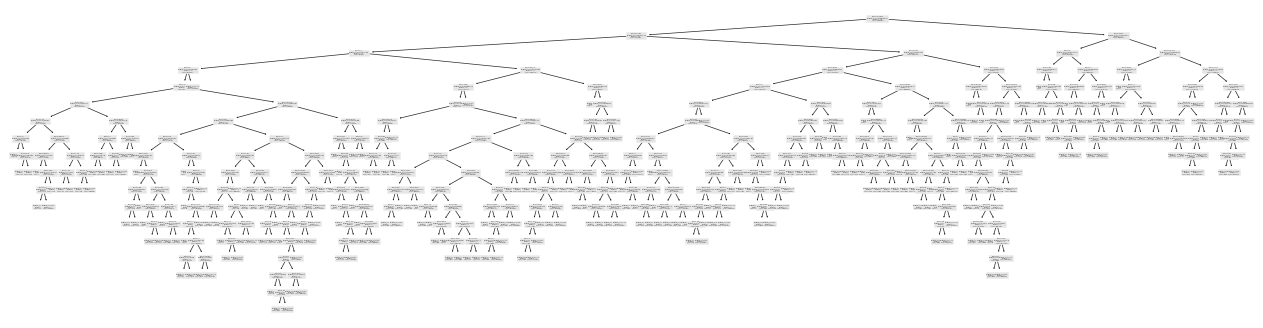

In [43]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16, 4))
plot_tree(decision_tree);

We can see that the tree is quite deep and complex. Let's take a closer look at the nodes at the top

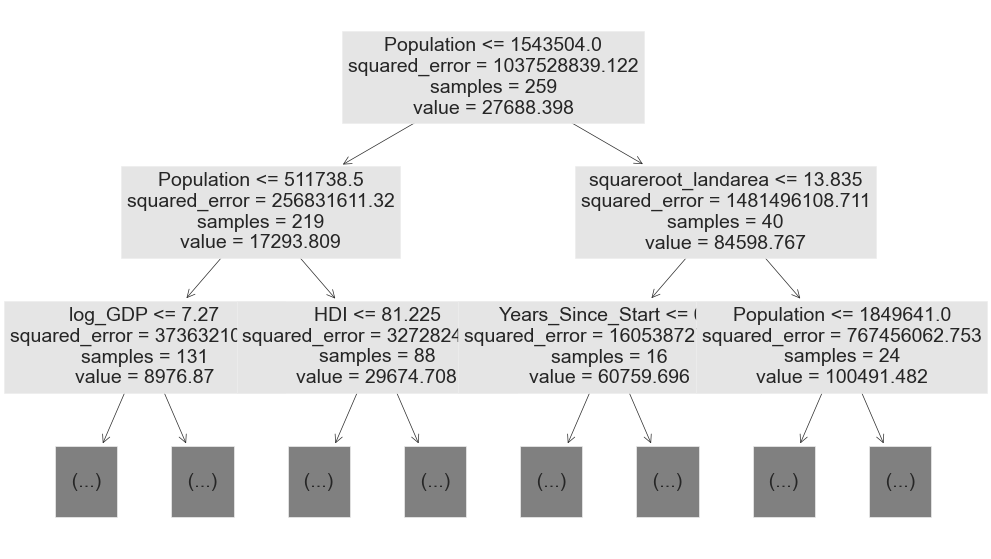

In [44]:
plt.figure(figsize=(12, 7))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=features);

**[replace with specific to this model]** There are a few things we can see right away:
* The first line tells us which feature to split on: values below the threshold go to the left, and values above go to the right.
* The third line tells us the number of training samples that made it that far into the tree.
* The fourth line tells us the average $y$-value (in this case, MSRP) of all the training samples that made it that far into the tree.

Just by looking at the first few layers, we can already see that the decision tree has pulled out the most expensive cars into some of the branches, and the less expensive ones into other branches.

Suppose we had stopped growing the tree at this point. That would have given us four leaf nodes, each with very different mean MSRP. Describe the node that contains the most expensive cars in plain English -- The second node from the left has the highest value at 88614, showing it contains the most expensive cars.

### Random Forest

In [45]:
# Define features and target variable
features = ['Population', 'log_GDP', 'log_Gini', 'squareroot_landarea', 'HDI', 'Years_Since_Start']
target = 'Plastic_per_year_tons'

# Split the data into features and target variable
X = ban_data[features]
y = ban_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

# Evaluate the model
y_pred_forest = random_forest.predict(X_test)
mse = mean_squared_error(y_test, y_pred_forest)
r2 = r2_score(y_test, y_pred_forest)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
y_pred_forest[:5]

Mean Squared Error: 387778126.41628397
R-squared Score: 0.6678969228712361


array([ 17078.5498979 , 122745.1249255 ,   4093.12940523,  15247.1889032 ,
        24331.91960679])

#### a) Accuracy

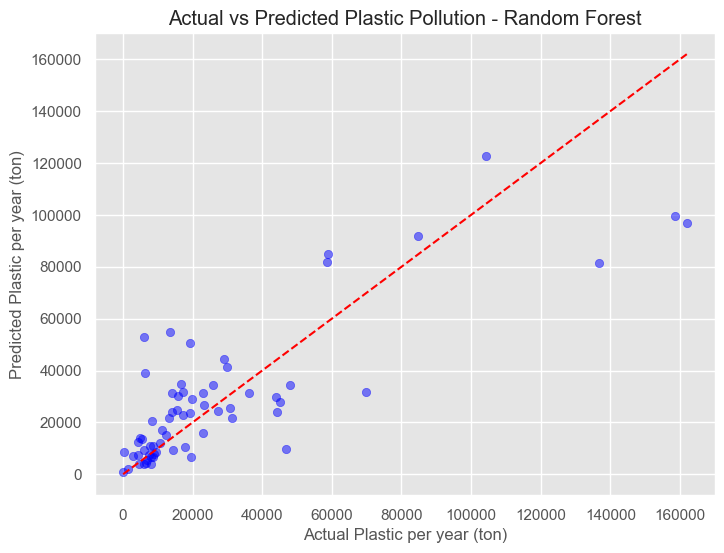

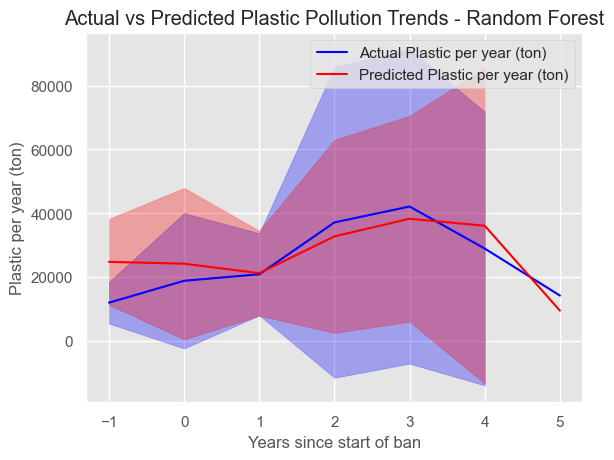

In [46]:
scatterplot_predvsactual(y_test, y_pred_forest, 'Random Forest')
trend_predvsactual(X_test, y_test, y_pred_forest, 'Random Forest')

#### b) Interpretability

Unfortunately, random forests are much harder to interpret than either of the other two methods that we've tried. In this case, with so few features, we might be able to look at the top of each tree and find similarities across most or all of the trees, but in high-dimensional problems, each tree should see a very different subset of features, and this becomes much harder.

# II. Choosing the best model

In [47]:
# predictions for lstm
predictions_unscaled = np.loadtxt("lstm_googlecolab/lstm_predictions.csv", delimiter=",")
# y_test_scaled = np.loadtxt("lstm_googlecolab/unscaled_y_test.csv", delimiter=",")

In [48]:
# Calculate error metrics for each model
error_metrics = {
    'Linear Model': mean_squared_error(y_test, y_pred_lr),
    'LSTM': mean_squared_error(y_test, predictions_unscaled),
    'SVM': mean_squared_error(y_test, y_pred_svm),
    'XGBoost': mean_squared_error(y_test, y_pred_xgb),
    'Gamma GLM': mean_squared_error(y_test, y_pred_gammaglm),
    'KNN': mean_squared_error(y_test, y_pred_knn),
    'Decision Tree': mean_squared_error(y_test, y_pred_tree),
    'Random Forest': mean_squared_error(y_test, y_pred_forest)
}

# Print error metrics
for model, error in error_metrics.items():
    print(f"{model}: Mean Squared Error = {error}")

Linear Model: Mean Squared Error = 442438137.6918364
LSTM: Mean Squared Error = 310311952.59585947
SVM: Mean Squared Error = 1322360629.8671887
XGBoost: Mean Squared Error = 309108544.76874995
Gamma GLM: Mean Squared Error = 1801448477.9711554
KNN: Mean Squared Error = 502097431.4229164
Decision Tree: Mean Squared Error = 404472588.035852
Random Forest: Mean Squared Error = 387778126.41628397


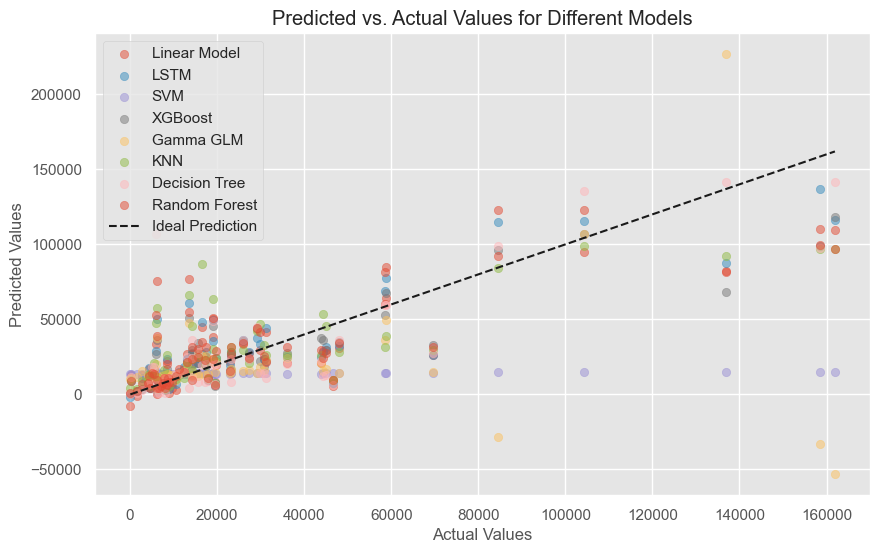

In [49]:
# Visualize predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, label='Linear Model', alpha=0.5)
plt.scatter(y_test, predictions_unscaled, label='LSTM', alpha=0.5)
plt.scatter(y_test, y_pred_svm, label='SVM', alpha=0.5)
plt.scatter(y_test, y_pred_xgb, label='XGBoost', alpha=0.5)
plt.scatter(y_test, y_pred_gammaglm, label='Gamma GLM', alpha=0.5)
plt.scatter(y_test, y_pred_knn, label='KNN', alpha=0.5)
plt.scatter(y_test, y_pred_tree, label='Decision Tree', alpha=0.5)
plt.scatter(y_test, y_pred_forest, label='Random Forest', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', label='Ideal Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values for Different Models')
plt.legend()
plt.show()

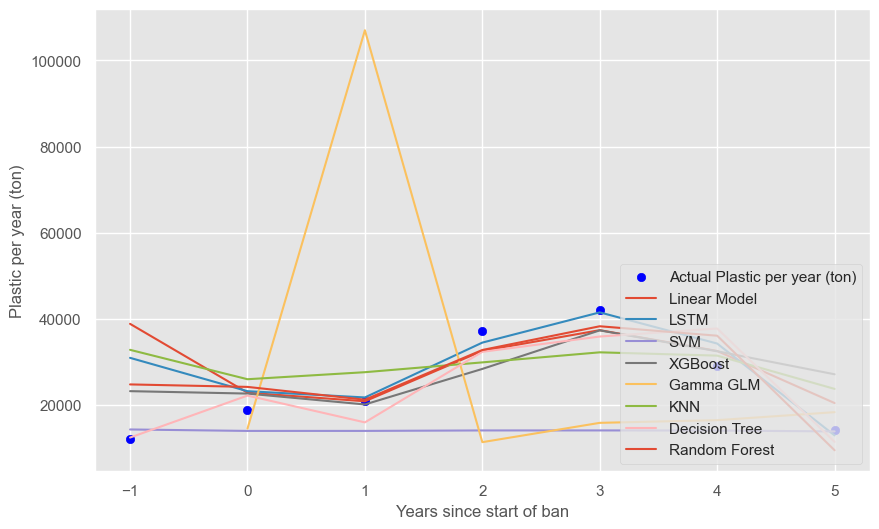

In [50]:
plt.figure(figsize=(10, 6))

# Plot the actual values
avg_actual_plastic = y_test.groupby(X_test['Years_Since_Start']).mean()
plt.scatter(avg_actual_plastic.index, avg_actual_plastic, label='Actual Plastic per year (ton)', color='blue')
# plt.plot(avg_actual_plastic.index, avg_actual_plastic, label='Actual Plastic per year (ton)', color='blue')

# Plot the predicted values
preds_dict = {
    'Linear Model': y_pred_lr,
    'LSTM': predictions_unscaled,
    'SVM': y_pred_svm,
    'XGBoost': y_pred_xgb,
    'Gamma GLM': y_pred_gammaglm.reset_index(drop=True),
    'KNN': y_pred_knn,
    'Decision Tree': y_pred_tree,
    'Random Forest': y_pred_forest
}

for model_name, preds in preds_dict.items():
    avg_predicted_plastic = pd.Series(preds, index=X_test['Years_Since_Start']).groupby(['Years_Since_Start']).mean()
    plt.plot(avg_predicted_plastic.index, avg_predicted_plastic, label=model_name)

# Add labels and title
plt.xlabel('Years since start of ban')
plt.ylabel('Plastic per year (ton)')
plt.legend(loc='lower right')

# Show the plot
plt.show()

Based solely off MSE, the 2 best models are XGBoost (Mean Squared Error = 309108544.76874995) and LSTM (Mean Squared Error = 310311952.59585947) and the worst model is SVM (Mean Squared Error = 1322360629.8671887). Since the 2 best MSE are so close, the deciding factor can come from things like complexity, interpretability, and computational resources, or other error metrics.

- XGBoost models are relatively less complex compared to deep learning models like LSTM.
- XGBoost tends to perform well on small to medium-sized datasets while LSTM models might require more data to effectively capture temporal patterns and dependencies.
- Both have good amount of room to improve given their fair amount of hyperparameters we can tune.

***Considering all of this, let's move forward with XGBoost.***

# III. Improving best model - XGBoost

- regularization
- hyperparam tuning
- ensemble methods
- crossvalidation 

## Initial model - Apply to cities without bans

In [15]:
cities_without_bans = data[~data['Regency/City'].isin(cities_with_bans)]
cities_without_bans

,Year,Province,Regency/City,Plastic_per_day_tons,Plastic_per_year_tons,Land_Area_km2,Population,GDP,Gini,HDI,highest_restriction,start_date,Years_Since_Start,log_GDP,log_Gini,squareroot_landarea
0,2019,Aceh,ACEH SELATAN,17.468853,6375.918288,4175.38,238081.0,5479425.66,0.273,66.90,None,2019,0,6.738735,-0.563837,64.617180
1,2019,Aceh,ACEH TENGAH,25.242500,9213.435000,4468.42,212494.0,7472445.90,0.256,73.14,None,2019,0,6.873463,-0.591760,66.846241
2,2019,Aceh,SIMEULUE,15.495900,5655.559350,1821.75,93228.0,2211885.58,0.340,65.70,None,2019,0,6.344763,-0.468521,42.681963
3,2019,Aceh,GAYO LUES,6.398800,2335.562000,5541.29,94100.0,2608733.70,0.290,66.87,None,2019,0,6.416430,-0.537602,74.439841
4,2019,Aceh,BENER MERIAH,11.816469,4312.692510,1907.40,148175.0,4423114.94,0.267,72.97,None,2019,0,6.645728,-0.573489,43.673791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,2022,Sumatera Utara,ASAHAN,66.880641,24411.474898,3737.83,787681.0,46575316.10,0.255,71.13,Fee,2020,2,7.668156,-0.593460,61.137795
1028,2022,Sumatera Utara,TOBA,13.587473,4959.533787,2291.62,212133.0,8943890.63,0.305,75.96,Fee,2020,2,6.951526,-0.515700,47.870868
1029,2022,Sumatera Utara,HUMBANG HASUNDUTAN,7.712900,2814.984900,2351.51,202299.0,6919485.07,0.258,70.32,Fee,2020,2,6.840074,-0.588380,48.492371
1031,2022,Sumatera Utara,KOTA PEMATANG SIANTAR,24.143000,8812.144000,75.92,274056.0,15208308.14,0.321,79.70,Fee,2020,2,7.182081,-0.493495,8.713208


## [to do] make sure this prediction actually tackles what would happen if ban enacted -- i think this does that but the question is this model assume the ban enacted when? bc that will affect the range of years since start

In [16]:
cities_without_bans[cities_without_bans['highest_restriction'] == 'None']['Years_Since_Start']

0       0
1       0
2       0
3       0
4       0
       ..
995     0
996     0
997     0
998     0
1000    0
Name: Years_Since_Start, Length: 143, dtype: int64

In [17]:
cities_without_bans[cities_without_bans['highest_restriction'] == 'Fee']['Years_Since_Start']

8       0
9       0
10      0
11      0
12      0
       ..
1027    2
1028    2
1029    2
1031    2
1033    2
Name: Years_Since_Start, Length: 566, dtype: int64

ohhh predicitons only until years since start = 2 because cities without bans have two options 1) No restriction, where year start date is set to the year value of that row so years_since_start will always be 0 or b) Fees, where start date is always 2020 and the latest year we have in our dataset is 2022 so max 2 year difference as the years since start -- is there a way to predict beyond that? 

to increase years since start (= current - startdate) would either need to up the value of the current or decrease the value of start year 
- change current aka up the latest year in our dataset; would need 2023 and so on data.... -- not sure is this available?
- change startdate, which is only possible for the cities without any restrictions at all because it is us that set their startdate of none to be the year itself; which is why 0. but cannot change startdate for cities with bans because according to literature it is since 2020.
**-- wait jk maybe can change the startdate to be 2019 or anything else for all since the beginning before feed into model... so yearssincestart change** 

In [18]:
# Step 1: Replace highest_restriction for cities without bans
simulated_ban_for_nobancities = cities_without_bans.copy()
simulated_ban_for_nobancities.loc[simulated_ban_for_nobancities['highest_restriction'] != 'Ban', 'highest_restriction'] = 'Ban'

# Step 2: Adjust start date for cities without bans
simulated_ban_for_nobancities.loc[simulated_ban_for_nobancities['highest_restriction'] == 'Ban', 'start_date'] = 2019

# Step 3: Reset Years_Since_Start based on the adjusted start date
simulated_ban_for_nobancities['Years_Since_Start'] = simulated_ban_for_nobancities['Year'] - simulated_ban_for_nobancities['start_date']

In [19]:
simulated_ban_for_nobancities

,Year,Province,Regency/City,Plastic_per_day_tons,Plastic_per_year_tons,Land_Area_km2,Population,GDP,Gini,HDI,highest_restriction,start_date,Years_Since_Start,log_GDP,log_Gini,squareroot_landarea
0,2019,Aceh,ACEH SELATAN,17.468853,6375.918288,4175.38,238081.0,5479425.66,0.273,66.90,Ban,2019,0,6.738735,-0.563837,64.617180
1,2019,Aceh,ACEH TENGAH,25.242500,9213.435000,4468.42,212494.0,7472445.90,0.256,73.14,Ban,2019,0,6.873463,-0.591760,66.846241
2,2019,Aceh,SIMEULUE,15.495900,5655.559350,1821.75,93228.0,2211885.58,0.340,65.70,Ban,2019,0,6.344763,-0.468521,42.681963
3,2019,Aceh,GAYO LUES,6.398800,2335.562000,5541.29,94100.0,2608733.70,0.290,66.87,Ban,2019,0,6.416430,-0.537602,74.439841
4,2019,Aceh,BENER MERIAH,11.816469,4312.692510,1907.40,148175.0,4423114.94,0.267,72.97,Ban,2019,0,6.645728,-0.573489,43.673791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,2022,Sumatera Utara,ASAHAN,66.880641,24411.474898,3737.83,787681.0,46575316.10,0.255,71.13,Ban,2019,3,7.668156,-0.593460,61.137795
1028,2022,Sumatera Utara,TOBA,13.587473,4959.533787,2291.62,212133.0,8943890.63,0.305,75.96,Ban,2019,3,6.951526,-0.515700,47.870868
1029,2022,Sumatera Utara,HUMBANG HASUNDUTAN,7.712900,2814.984900,2351.51,202299.0,6919485.07,0.258,70.32,Ban,2019,3,6.840074,-0.588380,48.492371
1031,2022,Sumatera Utara,KOTA PEMATANG SIANTAR,24.143000,8812.144000,75.92,274056.0,15208308.14,0.321,79.70,Ban,2019,3,7.182081,-0.493495,8.713208


In [20]:
# Prepare features for prediction (keep only relevant features used for training)
X_simulated = simulated_ban_for_nobancities[['Population', 'log_GDP', 'log_Gini', 'squareroot_landarea', 'HDI', 'Years_Since_Start']]

# Use your trained XGBoost model to predict plastic usage
predictions = xgb_model.predict(X_simulated)

# Combine predictions with city names or IDs
predictions_df = pd.DataFrame({'Province': simulated_ban_for_nobancities['Province'],
                               'Regency/City': simulated_ban_for_nobancities['Regency/City'], 
                               'Predicted_Plastic_Per_Year': predictions, 
                               'Years_Since_Start': simulated_ban_for_nobancities['Years_Since_Start']})

predictions_df

,Province,Regency/City,Predicted_Plastic_Per_Year,Years_Since_Start
0,Aceh,ACEH SELATAN,3785.610840,0
1,Aceh,ACEH TENGAH,3351.853760,0
2,Aceh,SIMEULUE,3257.567383,0
3,Aceh,GAYO LUES,5756.561523,0
4,Aceh,BENER MERIAH,2277.585449,0
...,...,...,...,...
1027,Sumatera Utara,ASAHAN,36898.500000,3
1028,Sumatera Utara,TOBA,9447.568359,3
1029,Sumatera Utara,HUMBANG HASUNDUTAN,3938.471924,3
1031,Sumatera Utara,KOTA PEMATANG SIANTAR,6513.425781,3


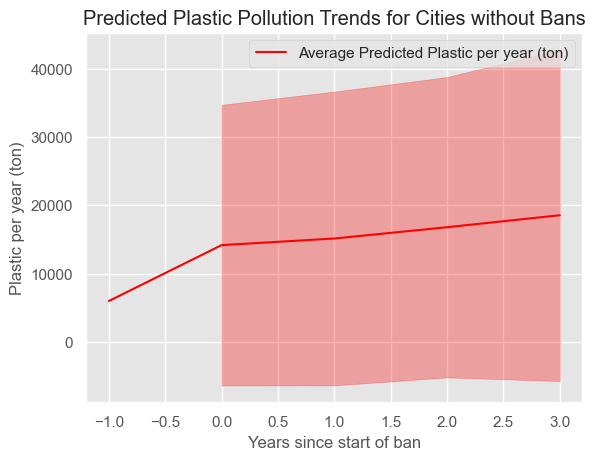

In [21]:
# Calculate average and standard deviation of predicted plastic per year
avg_predicted_plastic = predictions_df.groupby('Years_Since_Start')['Predicted_Plastic_Per_Year'].mean()
std_dev_predicted_plastic = predictions_df.groupby('Years_Since_Start')['Predicted_Plastic_Per_Year'].std()

# Plot the average predicted values
plt.plot(avg_predicted_plastic.index, avg_predicted_plastic, label='Average Predicted Plastic per year (ton)', color='red')

# Plot the shaded intervals representing variability for predicted values
plt.fill_between(avg_predicted_plastic.index, avg_predicted_plastic - std_dev_predicted_plastic, avg_predicted_plastic + std_dev_predicted_plastic, color='red', alpha=0.3)

# Add labels and title
plt.xlabel('Years since start of ban')
plt.ylabel('Plastic per year (ton)')
plt.title('Predicted Plastic Pollution Trends for Cities without Bans')
plt.legend()

# Show the plot
plt.show()

This is a bit weird that we do not see a decrease in plastic after ban is implemented, especially after ban has been implemented for 2 years (x-axis = 2.0) because as we learnt at the start of this process, there is usually a decrease in plastic after this cutoff of 2 years. Maybe it is because more cities have increases than cities that have decreases. Let's investigate on a more granular scale. 

In [22]:
predictions_df.groupby(['Years_Since_Start','Province'])['Predicted_Plastic_Per_Year'].mean()

Years_Since_Start  Province         
-1                 Papua Barat           6002.671875
 0                 Aceh                  4563.266602
                   Banten               54256.433594
                   Bengkulu              3313.437500
                   Gorontalo             5003.650391
                                            ...     
 3                 Sulawesi Tenggara     6695.462891
                   Sulawesi Utara        7871.888184
                   Sumatera Barat        9962.922852
                   Sumatera Selatan     15626.395508
                   Sumatera Utara       27179.597656
Name: Predicted_Plastic_Per_Year, Length: 123, dtype: float32

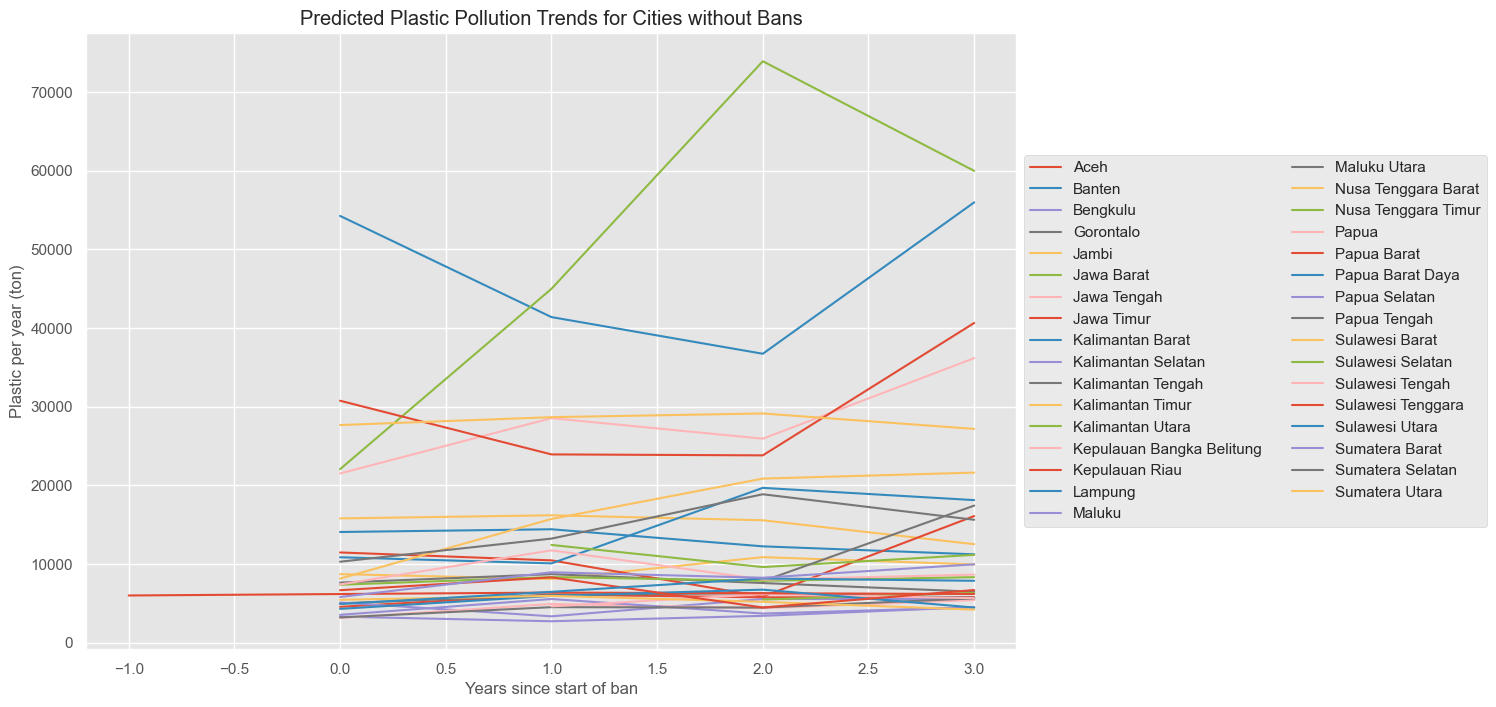

In [23]:
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Calculate average predicted plastic values by province
avg_predicted_plastic_by_province = predictions_df.groupby(['Years_Since_Start','Province'])['Predicted_Plastic_Per_Year'].mean().reset_index()

# Plot the average predicted values for each province
for province, avg_plastic_values in avg_predicted_plastic_by_province.groupby('Province'):
    plt.plot(avg_plastic_values['Years_Since_Start'], avg_plastic_values['Predicted_Plastic_Per_Year'], label=province)

# Add labels and title
plt.xlabel('Years since start of ban')
plt.ylabel('Plastic per year (ton)')
plt.title('Predicted Plastic Pollution Trends for Cities without Bans')

# Move the legend outside the plot and make it two columns
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)

# Show the plot
plt.show()


Here are the predicted plastic pollution trends by province; just average the predicted values for all the regency/city in that province. We definitely see that there is a decrease in plastic after ban implemented for 2 years, but only for some provinces -- so our hypothesis was right. Let's try to investigate for what provinces there are decreases after 2 years of bans. Maybe it is easier to investigate this by different area; I suspect that the provinces that see decreases vs neutral vs increases will probably be from the same general area, so let's make these general area categories first, just using the domain knowledge I have.

In [24]:
province_categories = {
    'Aceh': 'Aceh & Riau Islands',
    'Banten': 'Java',
    'Bengkulu': 'Sumatra',
    'Gorontalo': 'Sulawesi',
    'Jambi': 'Sumatra',
    'Jawa Barat': 'Java',
    'Jawa Tengah': 'Java',
    'Jawa Timur': 'Java',
    'Kalimantan Barat': 'Kalimantan',
    'Kalimantan Selatan': 'Kalimantan',
    'Kalimantan Tengah': 'Kalimantan',
    'Kalimantan Timur': 'Kalimantan',
    'Kalimantan Utara': 'Kalimantan',
    'Kepulauan Bangka Belitung': 'Sumatra',
    'Kepulauan Riau': 'Aceh & Riau Islands',
    'Lampung': 'Sumatra',
    'Maluku': 'Maluku',
    'Maluku Utara': 'Maluku',
    'Nusa Tenggara Barat': 'Bali & Nusa Tenggara',
    'Nusa Tenggara Timur': 'Bali & Nusa Tenggara',
    'Papua': 'Papua',
    'Papua Barat': 'Papua',
    'Papua Barat Daya': 'Papua',
    'Papua Selatan': 'Papua',
    'Papua Tengah': 'Papua',
    'Sulawesi Barat': 'Sulawesi',
    'Sulawesi Selatan': 'Sulawesi',
    'Sulawesi Tengah': 'Sulawesi',
    'Sulawesi Tenggara': 'Sulawesi',
    'Sulawesi Utara': 'Sulawesi',
    'Sumatera Barat': 'Sumatra',
    'Sumatera Selatan': 'Sumatra',
    'Sumatera Utara': 'Sumatra'
}

# Create the 'Province_Category' column based on the province names
avg_predicted_plastic_by_province['Province_Category'] = avg_predicted_plastic_by_province['Province'].map(province_categories)


In [25]:
avg_predicted_plastic_by_province

,Years_Since_Start,Province,Predicted_Plastic_Per_Year,Province_Category
0,-1,Papua Barat,6002.671875,Papua
1,0,Aceh,4563.266602,Aceh & Riau Islands
2,0,Banten,54256.433594,Java
3,0,Bengkulu,3313.437500,Sumatra
4,0,Gorontalo,5003.650391,Sulawesi
...,...,...,...,...
118,3,Sulawesi Tenggara,6695.462891,Sulawesi
119,3,Sulawesi Utara,7871.888184,Sulawesi
120,3,Sumatera Barat,9962.922852,Sumatra
121,3,Sumatera Selatan,15626.395508,Sumatra


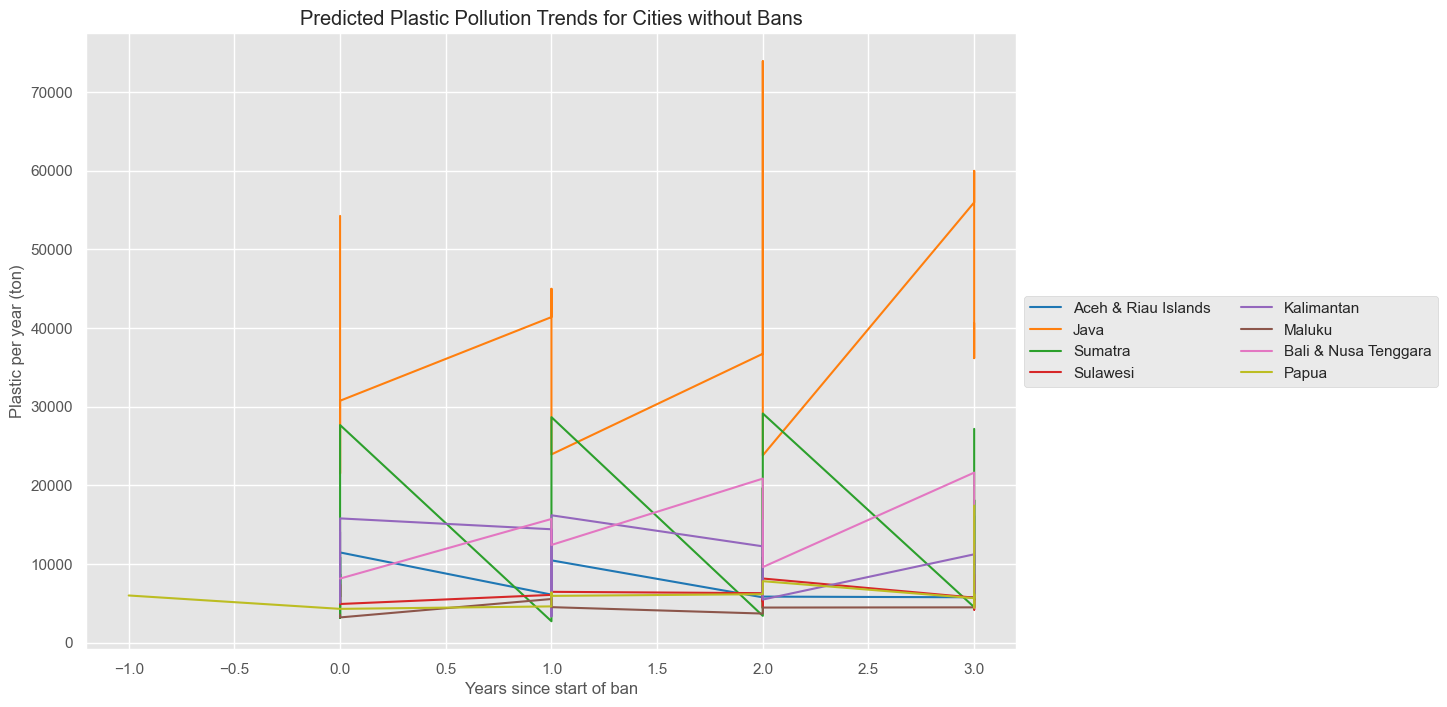

In [26]:
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Define the groups and corresponding colors
provincecategory_colors = {
    'Aceh & Riau Islands': 'tab:blue',
    'Java': 'tab:orange',
    'Sumatra': 'tab:green',
    'Sulawesi': 'tab:red',
    'Kalimantan': 'tab:purple',
    'Maluku': 'tab:brown',
    'Bali & Nusa Tenggara': 'tab:pink',
    'Papua': 'tab:olive'
}

# Plot the average predicted values for each province category
for category, color in provincecategory_colors.items():
    province_data = avg_predicted_plastic_by_province[avg_predicted_plastic_by_province['Province_Category'] == category]
    plt.plot(province_data['Years_Since_Start'], province_data['Predicted_Plastic_Per_Year'], label=category, color=color)

# Add labels and title
plt.xlabel('Years since start of ban')
plt.ylabel('Plastic per year (ton)')
plt.title('Predicted Plastic Pollution Trends for Cities without Bans')

# Move the legend outside the plot and make it two columns
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)

# Show the plot
plt.show()


In [27]:
# Initialize a dictionary to store the decrease in plastic pollution for each province
decrease_by_province = {}

# Iterate over the DataFrame for each province
for province, province_data in avg_predicted_plastic_by_province.groupby('Province'):
    # Check if the DataFrame has enough rows to access the required indices
    if len(province_data) >= 4:
        # Calculate the decrease in plastic pollution between 2nd and 3rd year after ban start
        decrease = province_data.iloc[2]['Predicted_Plastic_Per_Year'] - province_data.iloc[3]['Predicted_Plastic_Per_Year']
        # Check if there's a downward trend
        if decrease > 0:
            decrease_by_province[province] = decrease

# Print the provinces with a decrease in plastic pollution and the decrease amount
print("Provinces with a decrease in plastic pollution between 2nd and 3rd year after ban start:")
for province, decrease in decrease_by_province.items():
    print(f"{province}: Decrease by {decrease} tons per year")


Provinces with a decrease in plastic pollution between 2nd and 3rd year after ban start:
Gorontalo: Decrease by 571.92919921875 tons per year
Jambi: Decrease by 927.537109375 tons per year
Jawa Barat: Decrease by 13934.8515625 tons per year
Kalimantan Barat: Decrease by 1014.66015625 tons per year
Kalimantan Tengah: Decrease by 1098.927734375 tons per year
Kalimantan Timur: Decrease by 3041.2099609375 tons per year
Lampung: Decrease by 1555.326171875 tons per year
Papua Barat: Decrease by 94.68505859375 tons per year
Papua Barat Daya: Decrease by 2276.83837890625 tons per year
Sulawesi Barat: Decrease by 994.11181640625 tons per year
Sulawesi Utara: Decrease by 289.3916015625 tons per year
Sumatera Selatan: Decrease by 3244.0380859375 tons per year
Sumatera Utara: Decrease by 1961.791015625 tons per year


## Visualize this on a map

In [28]:
!pip install geopandas

In [29]:
import geopandas as gpd
import matplotlib.pyplot as plt

import os
os.environ['SHAPE_RESTORE_SHX'] = 'YES'


# Load the shapefile of Indonesia's provinces
indonesia = gpd.read_file('id_shp/id.shp')
indonesia.head()

,id,name,source,geometry
0,IDKU,North Kalimantan,https://simplemaps.com,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,IDNT,Nusa Tenggara Timur,https://simplemaps.com,"MULTIPOLYGON (((124.03004 -9.34197, 124.06269 ..."
2,IDKB,Kalimantan Barat,https://simplemaps.com,"MULTIPOLYGON (((114.20741 1.43944, 114.20593 1..."
3,IDPA,Papua,https://simplemaps.com,"MULTIPOLYGON (((134.87349 -4.25461, 134.87361 ..."
4,IDJI,Jawa Timur,https://simplemaps.com,"MULTIPOLYGON (((113.39519 -8.44704, 113.40610 ..."


In [30]:
indonesia.shape

(34, 4)

In [31]:

# Filter the provinces
provinces = ['Gorontalo', 'Jambi', 'Jawa Barat', 'Kalimantan Barat', 'Kalimantan Tengah', 
             'Kalimantan Timur', 'Lampung', 'Papua Barat', 'Papua Barat Daya', 'Sulawesi Barat', 
             'Sulawesi Utara', 'Sumatera Selatan', 'Sumatera Utara']
filtered = indonesia[indonesia['name'].isin(provinces)]

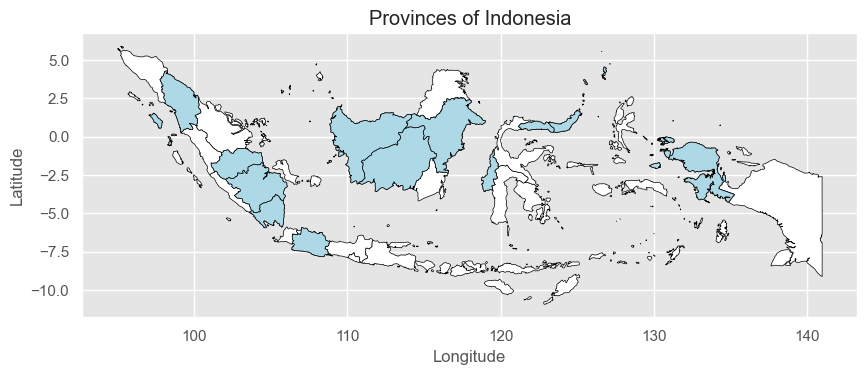

In [32]:
# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
indonesia.plot(ax=ax, color='white', edgecolor='black')
filtered.plot(ax=ax, color='lightblue', edgecolor='black')
plt.title('Provinces of Indonesia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


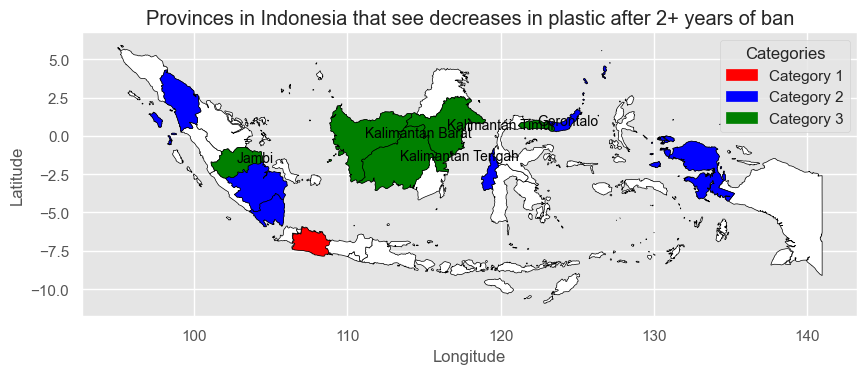

In [33]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Define colors for each category
category_colors = {
    'Category 1': 'red',
    'Category 2': 'blue',
    'Category 3': 'green'
}

# Assign categories to provinces
category_mapping = {
    'Jawa Barat': 'Category 1',
    'Lampung': 'Category 2',
    'Papua Barat': 'Category 2',
    'Papua Barat Daya': 'Category 2',
    'Sulawesi Barat': 'Category 2',
    'Sulawesi Utara': 'Category 2',
    'Sumatera Selatan': 'Category 2',
    'Sumatera Utara': 'Category 2',
    'Gorontalo': 'Category 3',
    'Jambi': 'Category 3',
    'Kalimantan Barat': 'Category 3',
    'Kalimantan Tengah': 'Category 3',
    'Kalimantan Timur': 'Category 3'
}

# Add a new column for category
indonesia['category'] = indonesia['name'].map(category_mapping)

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))

# Create legend handles and labels
handles = []
labels = []

indonesia.plot(ax=ax, color='white', edgecolor='black')
# Plot each category separately
for category, color in category_colors.items():
    filtered = indonesia[indonesia['category'] == category]
    filtered.plot(ax=ax, color=color, edgecolor='black', label=category)
    
    # Add legend handles and labels only once per category
    handles.append(plt.Rectangle((0,0),1,1, color=color))
    labels.append(category)

# Annotate province names
for idx, row in filtered.iterrows():
    ax.annotate(text=row['name'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), color='black', fontsize=10)


# Add legend with text labels
plt.legend(handles, labels, title='Categories')

plt.title('Provinces in Indonesia that see decreases in plastic after 2+ years of ban')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



## Start build and train next model!

In [48]:
# Define features and target variable
features = ['Population', 'log_GDP', 'log_Gini', 'squareroot_landarea', 'HDI', 'Years_Since_Start']
target = 'Plastic_per_year_tons'

# Split the data into features and target variable
X = ban_data[features]
y = ban_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Evaluate the model
y_pred_xgb = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
y_pred_xgb[:5]

Mean Squared Error: 309108544.76874995
R-squared Score: 0.7352715589370455


array([ 13854.602, 106769.   ,   1677.023,  17108.65 ,  23859.336],
      dtype=float32)

## Using Cross Validation to tune hyperparameters
K-fold cross validation allows us to use more data for training instead of having to set aside some specifically for hyperparameter selection. This step helps ensure that the model generalizes well to unseen data and provides a more accurate estimate of its performance. However, doing so requires more computation resources as we'll have to fit K models per hyperparameter choice -- so be mindful that k-fold CV may not be a good option in expensive data cases.

When we use K-fold cross validation, rather than using a held out set for model selection, we instead use the training set for model selection. To select between various features, various models, or various hyperparameters, we split the training set further into multiple temporary train and validation sets (each split is called a "fold", hence k-fold cross validation). We will use the average validation error across all k folds to make our optimal feature, model, and hyperparameter choices. 

In our case below, we will use GridSearchCV to perform cross-validation with each combination of hyperparameters and select the best combination based on the average performance across all folds. The general steps are:
1. Define a parameter grid specifying the hyperparameters you want to tune.
2. Use GridSearchCV or RandomizedSearchCV from scikit-learn to search the parameter grid for the best combination of hyperparameters. 
3. Evaluate each combination using cross-validation to find the optimal hyperparameters. This step helps find the best settings for hyperparameters such as learning_rate, max_depth, min_child_weight, and subsample.

## A) Hyperparameter Tuning

Some hyperparameters we can tune
- Learning Rate (learning_rate): This hyperparameter controls the step size at each iteration while moving toward a minimum of the loss function. Lower values make the model more robust, but require more boosting rounds. Typical range: [0.01, 0.3].
- Maximum Depth of a Tree (max_depth): This parameter controls the maximum depth of each tree. Deeper trees can capture more complex relationships but are more prone to overfitting. Typical range: [3, 10].
- Minimum Sum of Instance Weight (min_child_weight): This is the minimum sum of weights of all observations required in a child. It's used to control over-fitting. Higher values prevent the model from learning too specific patterns. Typical range: [1, 10].
- Subsample (subsample): This is the fraction of observations to be randomly sampled for each tree. Lower values make the algorithm more conservative and prevents overfitting but too low values might lead to underfitting. Typical range: [0.5, 1.0].

For the initial model (Mean Squared Error: 309108544.76874995, R-squared Score: 0.7352715589370455), we did not define any hyperparameters. Below are some of the notable hyperparameters and the default values it used
- Learning Rate (learning_rate): 0.3
- Maximum Depth of a Tree (max_depth): 6
- Minimum Sum of Instance Weight (min_child_weight): 1
- Subsample (subsample): 1.0

*We use negative MSE (mean squared error) in grid search because since MSE is the loss function we want to minimize, taking its negative counterpart will allow the grid search to maximize the performance metric.*

**Trying a faster but less comprehensive method by using RandomizedSearchCV (instead of GridSearchCV) and also setting early_stopping_rounds, which specifies the number of rounds with no improvement after which training will be stopped.**

In [51]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import xgboost as xgb
from scipy.stats import uniform, randint

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define parameter distributions
param_dist = {
    'learning_rate': uniform(0.01, 0.3 - 0.01),  # Uniform distribution between 0.01 and 0.3
    'max_depth': randint(3, 11),  # Discrete uniform distribution between 3 and 10
    'min_child_weight': randint(1, 6),  # Discrete uniform distribution between 1 and 5
    'subsample': uniform(0.5, 1.0 - 0.5)  # Uniform distribution between 0.5 and 1.0
}

# Create XGBoost model with early stopping
xgb_model = xgb.XGBRegressor(early_stopping_rounds=10, eval_metric="rmse")

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error')

# Perform randomized search with cross-validation
random_search.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

# Get best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Negative MSE Score:", best_score)


Best Parameters: {'learning_rate': 0.254578975389445, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.9242844288319778}
Best Negative MSE Score: -210084878.073796


In [52]:
# Define and train the XGBoost model
xgb_model_hyptune = xgb.XGBRegressor(
    learning_rate=0.254578975389445,
    max_depth=3,
    min_child_weight=2,
    subsample=0.9242844288319778)
xgb_model_hyptune.fit(X_train, y_train)

# Evaluate the model
y_pred_xgb_hyptune = xgb_model_hyptune.predict(X_test)
mse_hyptune = mean_squared_error(y_test, y_pred_xgb_hyptune)
r2_hyptune = r2_score(y_test, y_pred_xgb_hyptune)

print("Mean Squared Error (hyperparam tuned):", mse_hyptune)
print("R-squared Score (hyperparam tuned):", r2_hyptune)
y_pred_xgb_hyptune[:5]

Mean Squared Error (hyperparam tuned): 389183950.8147305
R-squared Score (hyperparam tuned): 0.6666929390030857


array([ 16816.13  , 121295.1   ,   1889.6174,  14121.879 ,  17721.63  ],
      dtype=float32)

**Now trying GridSearchCV -- this is a very brute force method that takes a lot of time and computational power, so will just try a few educated guesses as the options to choose hyperparam from. This may not be the best ones, but it is the best out of the limited options we gave it**

In [49]:
from sklearn.model_selection import GridSearchCV, train_test_split

# Split data into training and validation sets
X_train_hyp, X_val, y_train_hyp, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)  # Adjust test_size as needed

# Define parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [6, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 0.9, 1.0]
}

# Create XGBoost model with early stopping
xgb_model = xgb.XGBRegressor(early_stopping_rounds=10, eval_metric="rmse")  # Set the value according to your preference

# Set the validation dataset
eval_set = [(X_val, y_val)]

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search with cross-validation
grid_search.fit(X_train_hyp, y_train_hyp, eval_set=eval_set, verbose=False)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Negative MSE Score:", best_score)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'subsample': 0.9}
Best Negative MSE Score: -215975886.34953833


In [50]:
# Define and train the XGBoost model
xgb_model_hyptune = xgb.XGBRegressor(
    learning_rate=0.1,
    max_depth=7,
    min_child_weight=5,
    subsample=0.9)
xgb_model_hyptune.fit(X_train, y_train)

# Evaluate the model
y_pred_xgb_hyptune = xgb_model_hyptune.predict(X_test)
mse_hyptune = mean_squared_error(y_test, y_pred_xgb_hyptune)
r2_hyptune = r2_score(y_test, y_pred_xgb_hyptune)

print("Mean Squared Error (hyperparam tuned):", mse_hyptune)
print("R-squared Score (hyperparam tuned):", r2_hyptune)
y_pred_xgb_hyptune[:5]

Mean Squared Error (hyperparam tuned): 377677816.1133224
R-squared Score (hyperparam tuned): 0.6765470862070813


array([ 15106.686 , 131251.84  ,   2253.0193,  13496.009 ,  21077.895 ],
      dtype=float32)

If I had extra time and computational power, I would also explore tuning the following hyperparameters
- Gamma (gamma): A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split. Typical range: [0, 0.2].
- Colsample Bytree (colsample_bytree): This is the subsample ratio of columns when constructing each tree. Typical range: [0.6, 1.0].
- Alpha (alpha) and Lambda (lambda): L1 regularization term on weights and L2 regularization term on weights, respectively. They help in avoiding overfitting. Typical range: [0, 1].
- Number of Estimators (n_estimators): The number of boosting rounds or trees to build. Higher values can lead to overfitting, so it's good to tune this with other parameters. Typical range: [100, 1000].

## B) Regularization
After tuning the hyperparameters, you can apply regularization to prevent overfitting.
Tune parameters like gamma, alpha, and lambda to control the complexity of the model.
Regularization helps penalize large coefficients and simplify the model, reducing overfitting.

### Finding best regularization -- alpha or lambda or none, and by how much?

In [55]:
# Define the range of regularization parameters
param_grid = {
    'alpha': [0, 0.1, 0.2, 0.3],  # Regularization parameter for L1 regularization,
    'lambda': [0, 0.1, 0.2, 0.3] # Regularization parameter for L2 regularization,
}

# Initialize XGBRegressor
xgb_model_reg = xgb.XGBRegressor(learning_rate=0.1, max_depth=7, min_child_weight=5, subsample=0.9)

# Perform GridSearchCV with regularization
grid_search = GridSearchCV(estimator=xgb_model_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best regularization parameter
best_alpha = grid_search.best_params_['alpha']
best_lambda = grid_search.best_params_['lambda']

print(best_alpha, best_lambda)

0.2 0.2


In [61]:
# Train the XGBoost model with the best regularization parameter
xgb_model_reg_final = xgb.XGBRegressor(
    learning_rate=0.1,
    max_depth=7,
    min_child_weight=5,
    subsample=0.9, 
    reg_lambda=0.2  # Set the best regularization parameter
)
xgb_model_reg_final.fit(X_train, y_train)

# Evaluate the model
y_pred_xgb_reg_final = xgb_model_reg_final.predict(X_test)
mse_reg_final = mean_squared_error(y_test, y_pred_xgb_reg_final)
r2_reg_final = r2_score(y_test, y_pred_xgb_reg_final)
print(mse_reg_final, r2_reg_final)

577278709.2909176 0.5056037907856987


In [62]:
# Train the XGBoost model with the best regularization parameter
xgb_model_reg_final = xgb.XGBRegressor(
    learning_rate=0.1,
    max_depth=7,
    min_child_weight=5,
    subsample=0.9,
    alpha=0.2  # Set the best regularization parameter
)
xgb_model_reg_final.fit(X_train, y_train)

# Evaluate the model
y_pred_xgb_reg_final = xgb_model_reg_final.predict(X_test)
mse_reg_final = mean_squared_error(y_test, y_pred_xgb_reg_final)
r2_reg_final = r2_score(y_test, y_pred_xgb_reg_final)
print(mse_reg_final, r2_reg_final)

571869135.7394072 0.5102366875378027


It seems like L1 regularization gives better results. The difference between the two are that
- If you prefer sparsity in the feature weights or want to perform feature selection, you might choose L1 regularization (alpha).
- If you want smoother and more evenly distributed feature weights, you might choose L2 regularization (lambda).
This tells us that feature selection is a greater priority for our dataset and task.

However, for both cases, we see a very significant decrease in performance after regularization, indicating that both L2 regularization and L1 regularization might be too strong for your dataset, resulting in underfitting and decreased performance. Let's not move forward with regularization. 

## Evaluate the Improved Model & Finalize

Our 2 main error metrics are 
- MSE (Mean Squared Error): a lower MSE indicates that the model's predictions are closer to the actual values.
- R-squared (R2): R2 measures the proportion of the variance in the dependent variable that is explained by the independent variables. R2 ranges from 0 to 1, where 1 indicates that the model explains all the variability of the response data around its mean, and 0 indicates that the model does not explain any variability -- so higher values indicate better performance.

In general, a low MSE and a high R2 are desirable. In general R2 of 0.7 might be considered good, and MSE depends on the scale of our problem and numbers. Now let's compare the error metrics for our testing set before and after hyperparameter tuning as well as regularization.

In [80]:
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 309108544.76874995
R-squared Score: 0.7352715589370455


In [64]:
print("Mean Squared Error (with regularization & hyperparam tuned):", mse_hyptune)
print("R-squared Score (with regularization & hyperparam tuned):", r2_hyptune)

Mean Squared Error (with regularization & hyperparam tuned): 389183950.8147305
R-squared Score (with regularization & hyperparam tuned): 0.6666929390030857


With how the hyperparameters tuned, we see that surprisingly, MSE is higher and R2 is lower -- the worst of both cases. In some cases, a slightly higher MSE or lower R-squared might be acceptable if the model is more interpretable or easier to deploy in practice. Lower MSE can sometimes also be a sign of model working to prevent overfitting.

However, in this case the difference is quite significant before and after hyperparameter tuning. The initial model without hyperparameter tuning outperforms the model without regularization in terms of MSE and R-squared, so let's go with out initial model not only because of better error metrics, but also because it uses default values for its hyperparameters, thus leading to a less complex model. Less complex models are easier to interpret, and require less computational resources for training and inference, so they might be easier to deploy in production environments. 